# Foundations of Inference in Python

## 1. Inferential Statistics and Sampling


In this section, we'll explore the relationship between samples and statistically justifiable conclusions. Choosing a sample is the basis of making sound statistical decisions, and we’ll explore how the choice of a sample affects the outcome of your inference.

### 1.1 Statistical inference and random sampling

- How do we go from `descriptive statistics` to confident decision-making? 
- How can we apply hypothesis tests to solve real-world problems?

It all starts with a sample, as we rarely have access to the entire population. Given a sample, we likely want to compute some summary statistic to summarize our data. Note that descriptive statistics only attempt to describe the data. 

> `Inference` attempts to make conclusions and decisions from the data. This is an important distinction.

The core of statistical inference is `point estimates`. A point estimate is a single value which serves as a best guess at an unknown population parameter. However, our point estimate depends on our sample. Different samples will yield different point estimates.  Therefore, when trying to make inference, the first step is always to consider our sample carefully.



### 1.1.1 Sampling and point estimates


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

btc_sp_df = pd.read_csv('data/btc_sp.csv')
btc_sp_df.head()

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500
0,2017-08-07,3212.780029,3397.679932,3180.889893,3378.939941,2480.91,2477.14,2480.95,2475.88
1,2017-08-08,3370.219971,3484.850098,3345.830078,3419.939941,2474.92,2478.35,2490.87,2470.32
2,2017-08-09,3420.399902,3422.760010,3247.669922,3342.469971,2474.02,2465.35,2474.41,2462.08
3,2017-08-10,3341.840088,3453.449951,3319.469971,3381.280029,2438.21,2465.38,2465.38,2437.75
4,2017-08-11,3373.820068,3679.719971,3372.120117,3650.620117,2441.32,2441.04,2448.09,2437.85


In [2]:
# Rows x Cols
btc_sp_df.shape

(1258, 9)

In [3]:
# Select a random starting row number, not including the last 90 rows
initial_row_number = np.random.choice(range(len(btc_sp_df) - 90))

# Use initial_row_number to select the next 90 rows from that row number
sample_df = btc_sp_df.iloc[initial_row_number:initial_row_number +90]
sample_df

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500
522,2019-09-04,10621.180664,10762.644531,10434.709961,10594.493164,2937.78,2924.67,2938.84,2921.86
523,2019-09-05,10588.183594,10627.269531,10516.417969,10575.533203,2976.00,2960.60,2985.86,2960.60
524,2019-09-06,10578.198242,10898.761719,10292.299805,10353.302734,2978.71,2980.33,2985.03,2972.51
525,2019-09-09,10443.228516,10450.311523,10144.929688,10334.974609,2978.43,2988.43,2989.43,2969.39
526,2019-09-10,10336.408203,10394.353516,10020.573242,10115.975586,2979.39,2971.01,2979.39,2957.01
...,...,...,...,...,...,...,...,...,...
607,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,3246.28,3217.55,3246.84,3214.64
608,2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,3237.18,3241.86,3244.91,3232.43
609,2020-01-08,8161.935547,8396.738281,7956.774414,8079.862793,3253.05,3238.59,3267.07,3236.67
610,2020-01-09,8082.295898,8082.295898,7842.403809,7879.071289,3274.70,3266.03,3275.58,3263.67


In [4]:
# first row
sample_df.iloc[-1]

Date            2020-01-10
Open_BTC       7878.307617
High_BTC       8166.554199
Low_BTC        7726.774902
Close_BTC      8166.554199
Close_SP500        3265.35
Open_SP500         3281.81
High_SP500         3282.99
Low_SP500          3260.86
Name: 611, dtype: object

In [5]:
# Use sample_df to compute the percent increase in Close_SP500
sp500_pct_change = (sample_df.iloc[0]['Close_SP500'] - sample_df.iloc[-1]['Close_SP500']) / sample_df.iloc[0]['Close_SP500']

# Use sample_df to compute the percent increase in Close_BTC
btc_pct_change = -(sample_df.iloc[0]['Close_BTC'] - sample_df.iloc[-1]['Close_BTC']) / sample_df.iloc[0]['Close_BTC']

print('SP500: ', sp500_pct_change, '\n', 'BTC: ', btc_pct_change)

SP500:  -0.111502563159937 
 BTC:  -0.22916990245933766


#### 1.1.2 Repeated sampling, point estimates and inference

in the previous example, we used a single sample of ninety days to make our conclusion. However, what if we had a different ninety days. Would our conclusions be different?

One way to assess this is by taking repeated samples. By repeatedly sampling from our data and computing our point estimate we can see how it changes.

In [6]:
btc_pct_change_list = []

# Write a for loop which repeats the sampling ten times
for i in range(100):
    # Select a random starting row number
    initial_row_number = np.random.choice(range(btc_sp_df.shape[0] - 90))
    # Select the next 90 rows after the starting row
    sample_df = btc_sp_df[initial_row_number:initial_row_number + 90]
    # Compute the percent change in closing price of BTC and print it
    btc_pct_change = -(sample_df.iloc[0]['Close_BTC'] - sample_df.iloc[-1]['Close_BTC']) / sample_df.iloc[0]['Close_BTC']
    btc_pct_change_list.append(btc_pct_change)
    #print(btc_pct_change)

Moving from just a single point estimate to repeated point estimates gives you a clearer picture of how reliable your point estimate is for inference. Notice how much variation there is in the change in BTC, depending on the days selected. This suggests that a single point estimate isn't great for inference.

### 1.2 Sampling and bias

We saw that inference is directly influenced by the sample chosen. This means that our choice of a sample is fundamental in making principled, repeatable, and valid inference. The main concern when selecting a sample is `bias`. A biased sample is one where one group occurs far more or less often in the sample than in the population. Using a biased sample in inference means we will draw conclusions based on a sample which does not look like our population.

Samples affect point estimates, and thus affect inference. Whenever we compute a point estimate, the value comes directly from our data. So if we change our data, our point estimate will also change. In particular, when performing a hypothesis test, the result we get is directly dependent on the sample, and may change with a different sample. Therefore, the inference we make may be completely different depending on the sample! In addition, when we conduct a hypothesis test, the computation of our p-value uses data coming from our sample, and is thus directly affected by our sample. Again, we use the results of our hypothesis test to make inference about our situation. Thus a different sample can potentially yield a completely different conclusion!

On the other hand, some things do not depend on our sample. For one, there is some true population statistic which we can never observe. This is the value coming from the entire population, such as the percentage of our potential customers who will actually buy the product. The goal of inference is generally to infer what this value may be. The value of this population statistic is not affected by our choice of a sample. We discussed in the previous slide how our sample can affect the calculation of our p-value. However, once we have a p-value, our conclusion is based only on this p-value and our choice of alpha. Therefore, given a p-value, our conclusion no longer depends on the sample.





#### 1.2.1 Visualizing samples

We saw that a single sample can give an unreliable point estimate. To investigate this let's take 100 samples of 90 consecutive days of BTC trading data, compute the percent change in BTC over that time period, and plot this data as a histogram to understand the sampling distribution.

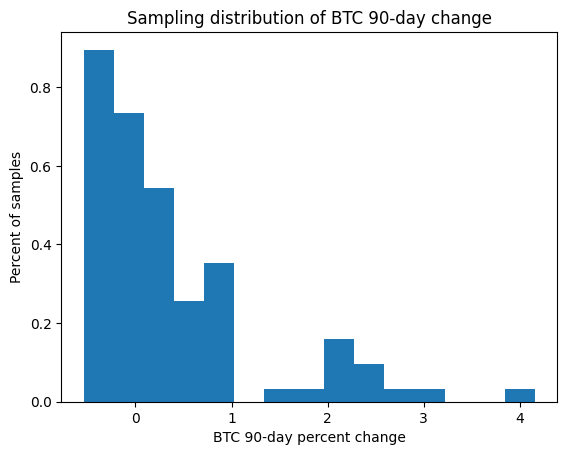

In [7]:
# Plot a histogram of percent changes
plt.hist(btc_pct_change_list, bins=15, density=True)
# Set the x-axis label
plt.xlabel('BTC 90-day percent change')
# Set the y-axis label
plt.ylabel('Percent of samples')
# Set the title
plt.title('Sampling distribution of BTC 90-day change')

plt.show()

Visualizing your data is a great complement to computing summary statistics! Notice that although a percent change in BTC around zero was the most common, it was far from the only outcome. The long tail to the right indicates that periods with an increase happen often enough to not just be dismissed as outliers.

#### 1.2.2 Inference and bias

The components that go into a hypothesis test are heavily dependent on a sample, but the results from the hypothesis test are not dependent. This means you need to be very careful when choosing your sample when it come to inference!

### 1.3 Confidence intervals and sampling

While point estimates are one tool for inference, a single number will never be a perfect estimate of a population statistic. Confidence intervals provide a different way to make inferences about our population. 

A confidence interval takes a sample and uses it to generate a range of values within which we have high confidence that the population statistic we are estimating lies. The reliability of our confidence interval requires our sampling distribution to be approximately normal! If it's not, our inference may be invalid. The reason for this is what is called the `Central Limit Theorem`.

Calculation of a confidence interval using SciPy involves knowing the mean, sample size and standard deviation. The confidence interval is centered at the mean, and so is given using the "loc" parameter. The "scale" is the `standard error`, which is the standard deviation divided by the square root of the sample size. Finally, we need to specify what confidence level to use, by using the "alpha" parameter.

> Suppose a sample of one hundred employees at a company gave an average salary of eighty thousand dollars and a standard deviation of ten thousand dollars :

In [8]:
from scipy import stats

ci = stats.norm.interval(loc=80000, #mean
                         scale=10000/np.sqrt(100), #StandardError
                         confidence=0.95) #Confidence level
ci

(78040.03601545995, 81959.96398454005)

Our confidence interval comes from the mean and standard error of our sample. Therefore, different samples will yield different confidence intervals, and thus potentially different conclusions. In many cases, populations are incredibly diverse. Imagine a city with wealthy and poor people, immigrants and native citizens, different races, ethnicities, religions and political views. Taking a sample that represents this broad diversity of people is incredibly difficult. But failure to do so would result in sampling bias, and would lead to a confidence interval that makes inference which is not applicable to the entire population.

While we can learn a lot from the confidence interval, there are some things it does not tell us. We cannot say something like "there is a 95 percent chance the population statistic is in the confidence interval." Either it is or is not in the confidence interval, we can't say more than that. Instead, we know that if we took many samples and constructed a confidence interval each time, then about 95 percent of the time our population statistic would lie in the confidence interval.

#### 1.3.1 Normal sampling distributions

Let's estimate a realistic mean closing price for the S&P 500 over a subset of its trading history. We'll select 500 random closing prices and take 200 sample, calculate the average for each sample, and plot a histogram to visualize whether the distribution is normal.

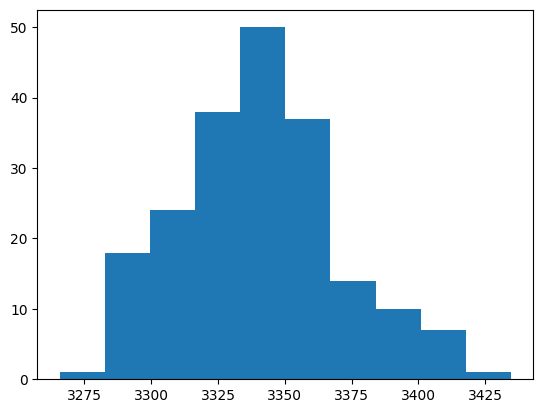

In [9]:
# Define the number of samples to take and store the sample means
num_samples = 200
sample_means = [] # empty

# Write a for loop which repeats the sampling num_samples times
for i in range(num_samples):
    
  # Select 500 random Close_SP500 prices 
  sp500_sample = np.random.choice(btc_sp_df.Close_SP500, size=500)
  # Compute mean closing price and save it to sample_means
  sample_means.append(sp500_sample.mean())
    
plt.hist(sample_means)
plt.show()

Notice how the sampling distribution is approximately normal, indicating that a confidence interval is a valid choice for estimating the closing price of the SP500.

#### 1.3.2 Calculating confidence intervals

In [10]:
# Select a sample of 500 random days
sample_closing = np.random.choice(btc_sp_df.Close_SP500, size=500)

# Calculate the mean of the sample
sample_mean = sample_closing.mean()

# Calculate the standard error of the sample
sample_se = sample_closing.std() / np.sqrt(sample_closing.shape[0])

# Calculate a 95% confidence interval using this data
conf_interval = stats.norm.interval(confidence=0.95,
                   loc=sample_mean,
                   scale=sample_se)

print(conf_interval)

(3255.2187509014484, 3377.966929098551)


#### 1.3.3 Drawing conclusions from samples

In this exercise we will ll analyze the average closing price of the S&P 500. If we take two different samples of trading days and compute confidence intervals for each, should we expect to see the same result? 

In [11]:
# Sample 1: Select a random sample of 500 rows
sample_df = btc_sp_df.sample(n=500)

# Compute a 95% confidence interval for the closing price of SP500
sample_ci = stats.norm.interval(confidence=0.95,
                                loc=sample_df.Close_SP500.mean(),
                                scale=sample_df.Close_SP500.std()/np.sqrt(sample_df.Close_SP500.shape[0]))

print(sample_ci)

(3301.1471316051375, 3420.4678283948624)


In [12]:
# Sample 2: Select the first 500 rows
first_500_df = btc_sp_df.iloc[:500]

# Compute a 95% confidence interval for the closing price of SP500
first_500_ci = stats.norm.interval(confidence=0.95,
                                loc=first_500_df.Close_SP500.mean(),
                                scale=first_500_df.Close_SP500.std()/np.sqrt(first_500_df.Close_SP500.shape[0]))

print(first_500_ci)

(2719.898053221996, 2744.858786778004)


The two samples are different, and thus the mean and standard error of the trading days are also different, which in turn leads to different confidence intervals.

## 2 Hypothesis Testing Toolkit

In thi ssection we will learn how to apply normality tests, correlation tests, and parametric and non-parametric tests for sound inference. Hypothesis tests are tools, and choosing the right tool for the job is critical for statistical decision-making. 

### 2.1 Normality tests

Normal distributions are foundational in statistics, but must be used with care. A powerful suite of statistical tools, which includes several common hypothesis tests, depends on the assumption that the underlying data is normally distributed.

When comparing model predictions to actual values, we expect points to be equally distributed above and below a line of best fit. Indeed, one of the assumptions of linear models is that data points are normally distributed about the prediction. To check whether our assumption holds, we take the prediction from the line minus the actual values to find the `residuals`, or "errors". When we plot the residuals, we may find that they are not at all normally distributed. Therefore, what seemed at first glance like a line that fit the data well ended up being anything but.

One way to test whether or not data was sampled from a normal distribution is to use an `Anderson-Darling` test of normality. The Anderson Darling test is done in `SciPy` using the `stats.anderson()` function.

Scipy returns an object and not just a p-value because it simultaneously tests for normality at the 15 percent level, all the way down to the one percent level. We conduct the test by comparing the test statistic, given by `result.statistic`, to each of the critical values. 

> If `test statistic > critical value` that means we reject the null hypothesis that the data is normally distributed. 

We can tell which significance level this is referring to by accessing `result.significance_level`.

If normality is satisfied we can use the `stats.norm.cdf()` function to find the percentage of values under a predefined threshold, by supplying the mean and standard deviation. 

#### 2.1.1 Testing for normality

A powerful suite of statistical tools, which includes several common hypothesis tests, depends on the assumption that the underlying data is normally distributed. While a histogram can hint at whether the data is approximately normally distributed, various hypothesis tests allow us to test this assumption directly. Moreover, histograms can be very sensitive to the number of bins, especially when the sample sizes are small.

In [13]:
salary_df = pd.read_csv('data/salary_df.csv')
salary_df.head()

,Unnamed: 0,Title,Gender,Ethnicity,Annual Salary,Years of Employment
0,266,Fire Specialist,F,Hispanic or Latino,79799.98,11
1,307,Fire Specialist,M,Hispanic or Latino,79799.98,11
2,346,Fire Specialist,M,Hispanic or Latino,83785.26,15
3,372,Fire Specialist,M,Hispanic or Latino,79799.98,12
4,411,Fire Specialist,M,Hispanic or Latino,96991.96,24


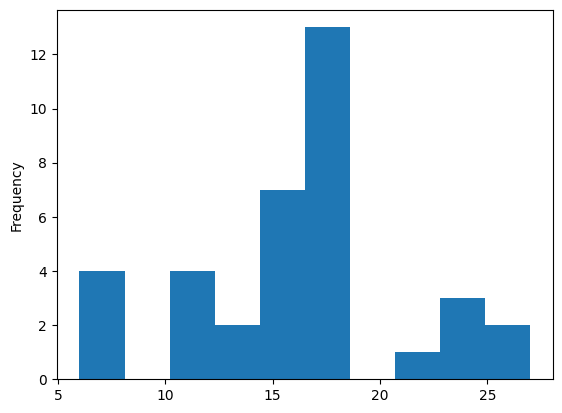

In [14]:
# Plot a histogram of the employees' "Years of Employment"
salary_df['Years of Employment'].plot(kind="hist")
plt.show()

In [15]:
from scipy.stats import anderson

# Conduct an Anderson-Darling test using the years of employment from salary_df
result = stats.anderson(salary_df['Years of Employment'])

# Print which critical values the test statistic is greater than the critical values
print(result.statistic > result.critical_values)

# Print the significance levels at which the null hypothesis is rejected
print(result.significance_level[result.statistic > result.critical_values])

[ True  True  True False False]
[15. 10.  5.]


Moving from point estimates to hypothesis tests is a big and important step! Notice how the test concludes that the Years of Employment may be normally distributed when assessed at the 2.5% significance level or below, but not below that. 

A typical bar for statistical significance is set at `5%`. Therefore, we can conclude that:

> **Years of Employment for these employees is indeed approximately normally distributed.**

#### 2.1.2 Distribution of errors

Almost no real-world process can be predicted perfectly. A desirable outcome is that the error is normally distributed. This means that some actual values will be above our prediction, and some will fall below it. That is, the errors (i.e. the difference between the actual values and predictions) will seem to "float" randomly around zero.

In [162]:
pred_salaries = pd.DataFrame({'salaries': salaries, 'preds': preds})
pred_salaries

,salaries,preds
0,72681.44,71169.43
1,83210.40,84943.05
2,83210.40,81882.24
3,72681.44,69639.02
4,95270.24,92260.86
...,...,...
1166,77767.04,78821.44
1167,83210.40,80351.84
1168,58680.96,65047.82
1169,72681.44,69639.02


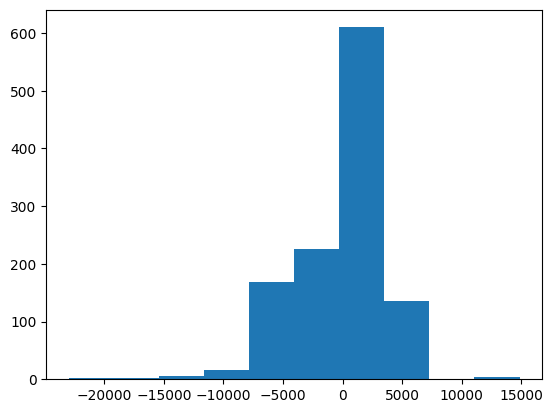

[15.  10.   5.   2.5  1. ]


In [165]:
# Compute the error as actual minus predicted salary
error = pred_salaries.salaries - pred_salaries.preds

# Plot the errors as a histogram
plt.hist(error)
plt.show()

# Conduct an Anderson-Darling test
result = stats.anderson(error)

# Find where the result is significant
print(result.significance_level[result.statistic > result.critical_values])

Using a normality test to assess the distribution of error terms is an important skill. Notice how the null hypothesis of normal distribution is rejected at all significance levels. Therefore, we can conclude that the errors are not normally distributed, and there is room for improvement in the model. 

> In particular, notice in our histogram how there are many errors between 0 and 5,000. This indicates that many salaries are about 5,000 higher than what was predicted.

#### 2.1.3 Fitting a normal distribution

When working with relatively small data sets you often don't have enough data to make principled inference. However, if you suspect the data follows a normal distribution, it may be reasonable to fit a normal distribution and work with this, rather than with the raw data. 

Let's return to the Hispanic firefighters which we previously showed was normally distributed at the 5% level.

In [19]:
# Fit a normal distribution to the data
mu, std = stats.norm.fit(salary_df["Years of Employment"]) # mu is the greek symbol for mean

# Compute the percentage of employees with less than 10 years experience
percent = stats.norm.cdf(10, loc=mu, scale=std)

# Print out this percentage
print(percent)

0.11763652155343629


Since the sample of Hispanic firefighters in this dataset (36) is relatively small, working with a model helps you avoid the noise inherent in small data sets. Note how we were able to make a precise estimate of the percent of these firefighters with less than ten years experience, even though the number of firefighters in the data set with this little experience is only four!

### 2.2 Correlation tests

Correlation refers to a statistical relationship between two variables. We often think of correlation as referring to a linear relationship, but this isn't always the case. Any time a change in one set of data helps describe the change in another data set, the two data sets are said to be correlated.

Pearson's R using the SciPy function `pearsonr()`. It returns both R, as well as a p-value. A large value of R, indicates that both samples are very highly positively linearly correlated. The p-value is testing the null hypothesis that the samples are uncorrelated. 

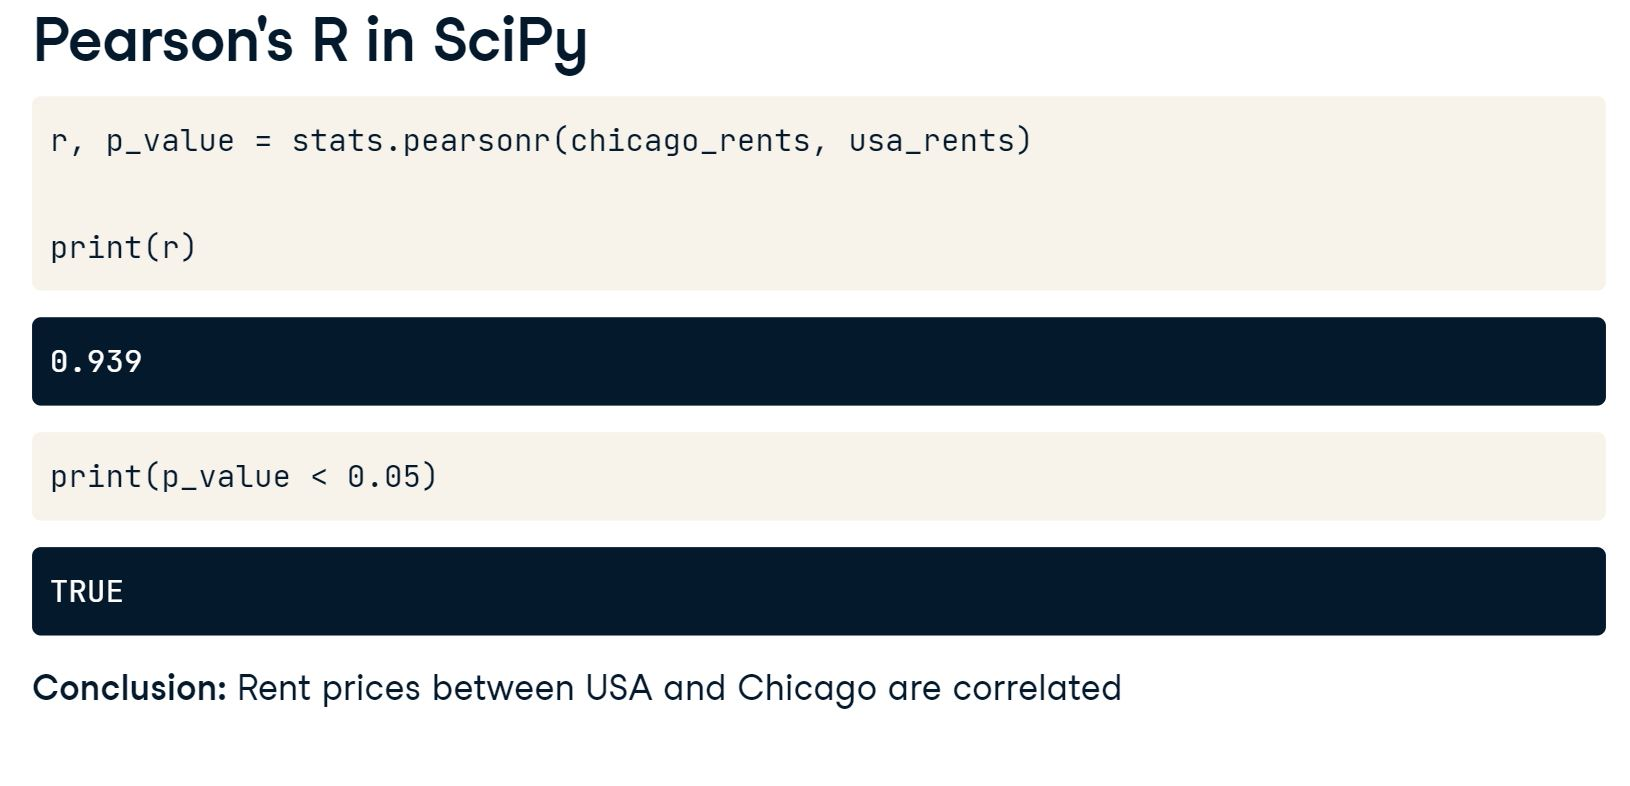

R-squared, or squaring Pearson's R, tells us the percent of variation in one sample that is explained by knowing the other sample. 

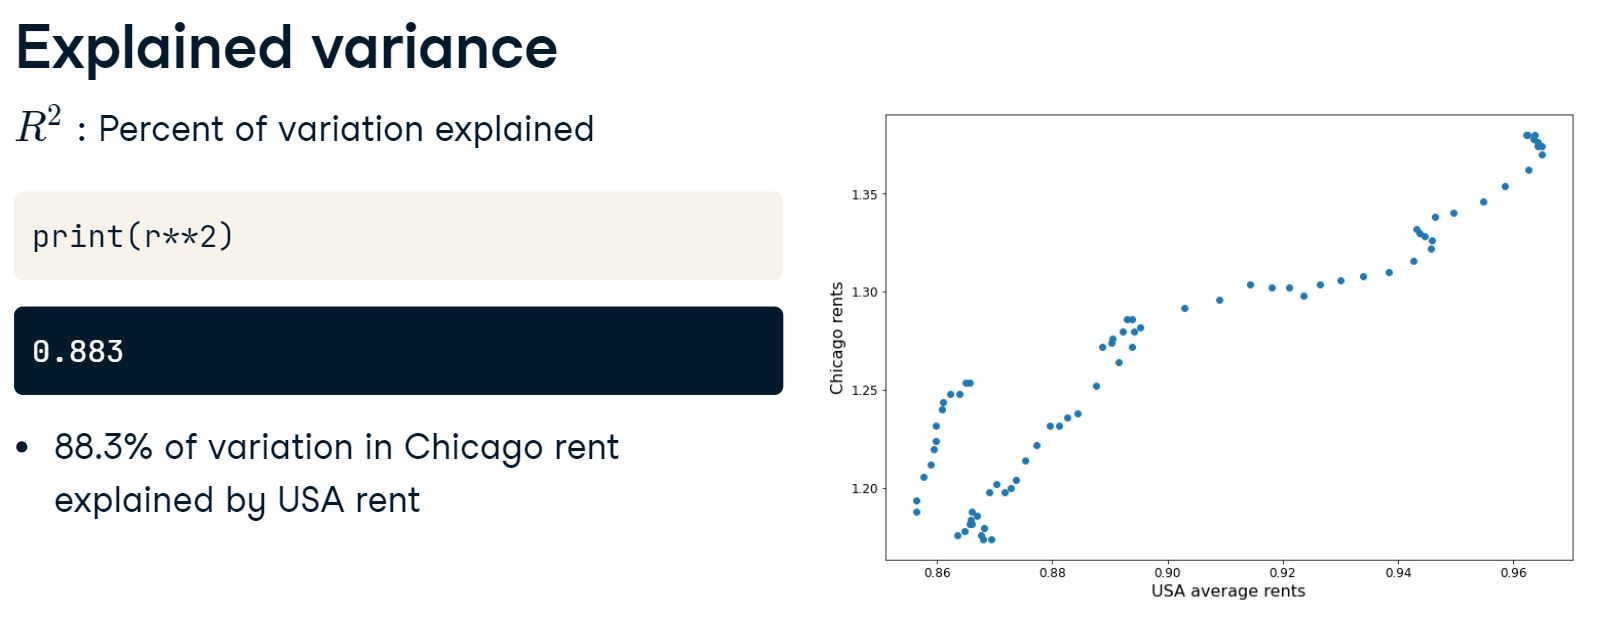

However, correlations can be hidden within our data. Failure to recognize and address these can cause hypothesis tests to give invalid conclusions. In particular, many hypothesis tests, such as a t-test, assume the samples are independent. However, sometimes data can be correlated with itself. For example, rent prices today depend strongly on rent prices yesterday, and don't simply fluctuate independently. Therefore, our data violates the assumption of normality required to conduct a t-test on this data.

Finally, data can be correlated with past values of itself. We call this `autocorrelation`. By viewing several steps, or lags, in the past, we can compare data to itself

#### 2.2.1 Testing for correlation & explained variance

We want to understand if rent prices in Las Vegas and Houston are correlated or not. If we see prices rising in Las Vegas, is it reasonable to assume they are also rising in Houston?

In [20]:
lasvegas_rents = np.array([0.75, 0.75, 0.748, 0.748, 0.746, 0.744, 0.742, 0.74, 0.736, 0.734,
       0.734, 0.732, 0.73, 0.728, 0.728, 0.724, 0.724, 0.722, 0.722,
       0.722, 0.722, 0.72, 0.72, 0.718, 0.72, 0.72, 0.72, 0.72, 0.718,
       0.718, 0.718, 0.718, 0.718, 0.718, 0.718, 0.72, 0.722, 0.724,
       0.724, 0.724, 0.724, 0.726, 0.726, 0.726, 0.726, 0.728, 0.73,
       0.732, 0.734, 0.736, 0.736, 0.738, 0.74, 0.742, 0.744, 0.748,
       0.752, 0.754, 0.756, 0.756, 0.754, 0.754, 0.756, 0.76, 0.764,
       0.768, 0.77, 0.772, 0.774, 0.772, 0.774, 0.774, 0.778, 0.78, 0.78])

In [21]:
houston_rents = np.array([0.788, 0.784, 0.784, 0.786, 0.792, 0.796, 0.796, 0.794, 0.788,
       0.784, 0.778, 0.772, 0.772, 0.776, 0.776, 0.78, 0.782, 0.786,
       0.786, 0.788, 0.788, 0.794, 0.798, 0.798, 0.798, 0.796, 0.8, 0.806,
       0.812, 0.818, 0.824, 0.83, 0.836, 0.84, 0.848, 0.856, 0.866, 0.872,
       0.874, 0.872, 0.868, 0.868, 0.874, 0.882, 0.892, 0.902, 0.914,
       0.924, 0.934, 0.944, 0.95, 0.956, 0.958, 0.962, 0.964, 0.968,
       0.972, 0.974, 0.974, 0.974, 0.972, 0.974, 0.976, 0.98, 0.982,
       0.984, 0.984, 0.982, 0.98, 0.976, 0.974, 0.974, 0.976, 0.976,
       0.974])

In [22]:
dates = pd.DatetimeIndex(data=['2010-11-01', '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
               '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01'])             

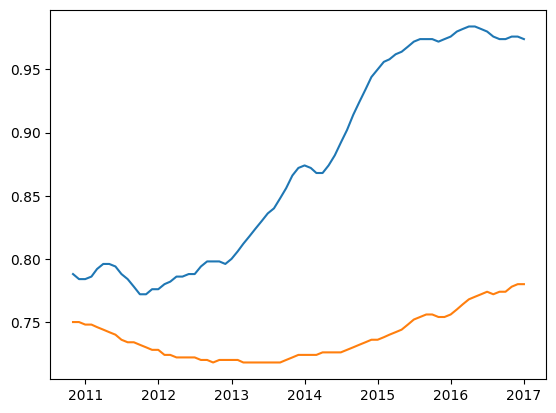

In [23]:
# Create a line graph showing the rents for both San Francisco and Las Vegas
plt.plot(dates, houston_rents, label='Houston')
plt.plot(dates, lasvegas_rents, label='Las Vegas')

plt.show()

In [24]:
# Compute the Pearson correlation coefficient R, as well as the p-value
r, p_value = stats.pearsonr(houston_rents, lasvegas_rents)

# Print if the p-value is less than alpha = 5%
print(f'The p-value is {p_value}.')
print(f'The p-value is less than 0.05: {p_value < 0.05}.')

# Print out R-squared
print(f'The r-squared value is {r**2}.')

The p-value is 4.889339466408384e-12.
The p-value is less than 0.05: True.
The r-squared value is 0.4821621973882167.


Making the connections between graphs, correlation coefficients, and their associated p-values is very powerful. Notice how the graphs seem to suggest some sort of positive correlation, and the strong correlation coefficient and extremely low p-value cement this fact. You can feel confident claiming that there is a strong relationship in rent prices between these two cities.

The interpretation of the r-squared value is as follows:

> **48.2% of variation in Houston rents is explained by Las Vegas rents, leaving 51.9% explainable by other factors.**

#### 2.2.2 Autocorrelation

Do rent prices tend to show a similar pattern when compared year-over-year? If you take the rent prices in Los Angeles and compare them to rent prices one year in the past, will you see a significant relationship? In other words, do rent prices in Los Angeles demonstrate autocorrelation?

In [25]:
la_rents = np.array([1.578, 1.578, 1.58, 1.582, 1.586, 1.588, 1.59, 1.594, 1.594, 1.594,
       1.592, 1.59, 1.592, 1.592, 1.59, 1.588, 1.588, 1.588, 1.59, 1.588,
       1.59, 1.588, 1.592, 1.594, 1.598, 1.602, 1.608, 1.616, 1.622,
       1.628, 1.634, 1.64, 1.648, 1.656, 1.662, 1.672, 1.676, 1.682, 1.68,
       1.68, 1.678, 1.682, 1.688, 1.696, 1.708, 1.72, 1.738, 1.76, 1.78,
       1.8, 1.816, 1.834, 1.85, 1.862, 1.87, 1.878, 1.888, 1.9, 1.908,
       1.914, 1.92, 1.93, 1.948, 1.962, 1.978, 1.99, 2.004, 2.018, 2.026,
       2.032, 2.038, 2.042, 2.048, 2.056, 2.064])

In [26]:
# Select all but the first twelve rents
la_rents_initial = la_rents[12:]

# Select all but the last twelve rents (12 month lag)
la_rents_lag = la_rents[:-12]

# Compute the correlation between the initial values and the lagged values
r, p_value = stats.pearsonr(la_rents_initial, la_rents_lag)

# Check if the p-value is significant at the 5% level
print(f'The p-value is{p_value}.')
print(f'The p-value is less than 0.05: {p_value < 0.05}.')

# Print out R-squared
print(f'The r-squared value is {r**2}.')

The p-value is5.205590226189667e-37.
The p-value is less than 0.05: True.
The r-squared value is 0.9304302130906672.


Autocorrelation is a powerful tool as it helps you understand to what the extent the past can explain the future. Notice how there is a very strong relationship between the rent prices one year in the past versus the present. This tells you that rents year-over-year tend to follow very similar patterns.

Given what you have just seen, would it be appropriate to conduct a `t-test` comparing the mean rent prices in each city?

> **No, since the data is autocorrelated, the assumption of independence in a t-test would be violated.**

### 2.3 Parametric tests

Parametric tests are a class of hypothesis tests, which require some aspect of our data to be normally distributed. 

`ANOVA` (Analysis of Variance) is one such test, which compares a mean value, or "response", from a **number** of different groups, or "factors". Compare this to a `t-test` which only works with *one or two* groups. 

1. The response in each factor must be normally distributed
2. Each factor must have the same variance

In [27]:
investments_df = pd.read_csv('data/investments_VC.csv')
investments_df.head()

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity
0,Games,4000000,operating,USA,2,0,4000000,0,0
1,Software,7000000,NaN,USA,1,0,7000000,0,0
2,Advertising,4912393,closed,ARG,1,0,0,0,0
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0
4,Games,41250,operating,HKG,1,41250,0,0,0


In [28]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Descriptive stats - average funding total by market
investments_df.groupby('market')['funding_total_usd'].mean().sort_values(ascending=False)

market
Clean Technology      35257674.65
Mobile                28929888.30
Web Hosting           27143436.85
Health Care           26450701.60
Semiconductors        26147777.74
Finance               24537141.54
Biotechnology         20838667.52
Enterprise Software   16972021.19
Manufacturing         15647388.00
E-Commerce            15337704.77
Security              15144599.45
Health and Wellness   14995740.81
Analytics             14762931.95
Advertising           13806613.53
Hardware + Software   12890274.14
Software              10425549.83
Games                  9776523.81
Education              9194975.48
Curated Web            7176644.99
Social Media           4942852.18
Name: funding_total_usd, dtype: float64

Let's check the normality assumption for the Health sector :

In [29]:
health_df = investments_df[investments_df['market'] == 'Health and Wellness']
health_df.head()

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity
6,Health and Wellness,1750000,operating,USA,1,0,0,0,0
38,Health and Wellness,30000000,operating,USA,1,0,30000000,0,0
51,Health and Wellness,325000000,operating,USA,1,0,0,0,325000000
93,Health and Wellness,3750000,operating,NaN,2,0,3750000,0,0
107,Health and Wellness,750000,operating,USA,1,750000,0,0,0


<AxesSubplot: ylabel='Frequency'>

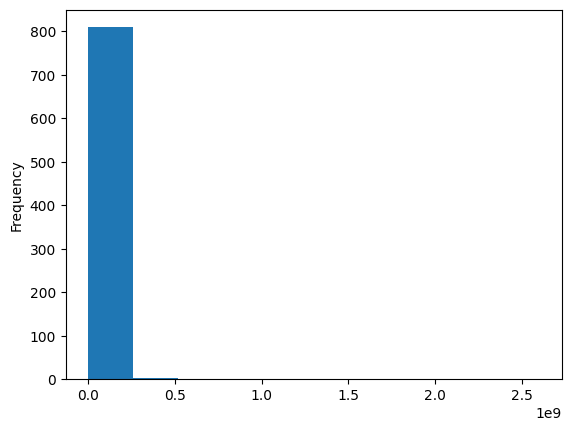

In [30]:
# check distribution of funding in Health sector
health_df['funding_total_usd'].plot(kind='hist')

We can see it's definitely not normally distributed, and has a heavy tail. This is because most companies had only small amounts of funding, with a few companies getting significantly higher funding.

A common trick when dealing with data of this sort of to take the logarithm. We refer to this as a ***log-transformation*** :

In [31]:
# log Xform the Health sector funding
health_log = np.log(health_df['funding_total_usd'])
health_log.head()

6     14.38
38    17.22
51    19.60
93    15.14
107   13.53
Name: funding_total_usd, dtype: float64

<AxesSubplot: ylabel='Frequency'>

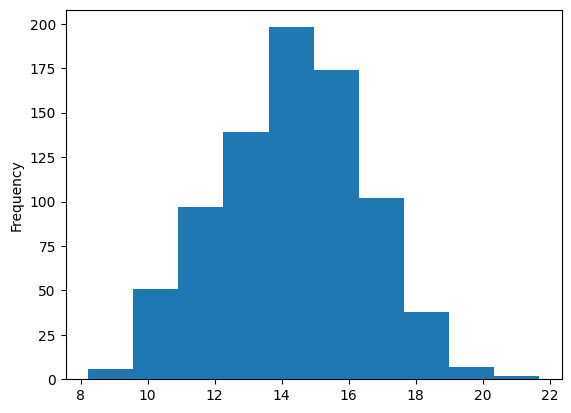

In [32]:
# check distribution of log Xformed funding in Health sector
health_log.plot(kind='hist')

If we were to follow this up with an Anderson-Darling test we would see that the log-transformed data is indeed normally distributed.

Let's now move on to the `equal variance` assumption. One way to check this is to compare the standard deviation of funding across sectors.

In [33]:
# Add our log Xform funding column
investments_df['log_funding'] = np.log(investments_df['funding_total_usd'])
investments_df.head()

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity,log_funding
0,Games,4000000,operating,USA,2,0,4000000,0,0,15.20
1,Software,7000000,NaN,USA,1,0,7000000,0,0,15.76
2,Advertising,4912393,closed,ARG,1,0,0,0,0,15.41
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0,14.51
4,Games,41250,operating,HKG,1,41250,0,0,0,10.63


In [34]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Descriptive stats - standard deviaiton of log Xform funding by market
investments_df.groupby('market')['log_funding'].std()

market
Advertising           2.25
Analytics             2.15
Biotechnology         1.95
Clean Technology      2.28
Curated Web           2.18
E-Commerce            2.38
Education             2.27
Enterprise Software   2.03
Finance               2.24
Games                 2.25
Hardware + Software   2.00
Health Care           2.17
Health and Wellness   2.15
Manufacturing         2.01
Mobile                2.22
Security              1.96
Semiconductors        1.59
Social Media          2.23
Software              2.08
Web Hosting           2.04
Name: log_funding, dtype: float64

To test if the differences in variance we see are statistically significant, we can use a **Levene** test of equal variance.

> The ***null hypothesis*** is that the populations from which the samples are drawn have ***equal*** variance.\
> The *alternative* is that the populations have *different* variances.

In [35]:
from scipy import stats
health_df = investments_df[investments_df['market'] == 'Health and Wellness']
analytics_df = investments_df[investments_df['market'] == 'Analytics']

In [36]:
s, p_value = stats.levene(health_df['log_funding'],
                          analytics_df['log_funding'])

# Check if the p-value is significant at the 5% level
print(f'The p-value is {p_value}.')
print(f'The p-value is less than 0.05: {p_value < 0.05}.')

The p-value is 0.7315297074914971.
The p-value is less than 0.05: False.


Since the p-value is not less than 5% we can conclude that **the markets do indeed have equal variance**.

> With both the normality assumption and equal variance assumptions met, we are now ready to perform an ANOVA test.

In [37]:
s, p_value = stats.f_oneway(health_df['log_funding'],
                            analytics_df['log_funding'])


print (f'The computed F statistic of the test is: {s}.')
# Check if the p-value is significant at the 5% level
print(f'The p-value is {p_value}.')
print(f'The p-value is less than 0.05: {p_value < 0.05}.')

The computed F statistic of the test is: 6.155041657653124.
The p-value is 0.013224586215948572.
The p-value is less than 0.05: True.


At the 95% level, the p-value is significant, and we can reject the hypothesis *$H_{0}$* : all mean funding across markets is equal, and conclude that the markets have **statistically significant different funding.**

ANOVA only tells us if all means are identical. If we reject the null, all we can conclude is that *$H_{a}$* : at least one mean is different.

Note that, whenever performing inference, a five percent cutoff is not set in stone. If you are willing to accept slightly less certainty, you could consider increasing your cutoff to ten percent when running your tests.

#### 2.3.1 Equal variance

In [38]:
investments_df.head(20)

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity,log_funding
0,Games,4000000,operating,USA,2,0,4000000,0,0,15.20
1,Software,7000000,NaN,USA,1,0,7000000,0,0,15.76
2,Advertising,4912393,closed,ARG,1,0,0,0,0,15.41
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0,14.51
4,Games,41250,operating,HKG,1,41250,0,0,0,10.63
5,E-Commerce,40000,operating,CHL,1,40000,0,0,0,10.60
6,Health and Wellness,1750000,operating,USA,1,0,0,0,0,14.38
7,Education,4400000,operating,GBR,2,400000,4000000,0,0,15.30
8,E-Commerce,2050000,operating,USA,4,0,0,0,0,14.53
9,Curated Web,2535000,acquired,USA,2,15000,2520000,0,0,14.75


In [39]:
investments_df_sample = investments_df[investments_df['market'].isin(['Biotechnology','Enterprise Software','Health and Wellness'])]
investments_df_sample = investments_df_sample[['market', 'funding_total_usd']]
investments_df_sample                                     
                                       

,market,funding_total_usd
6,Health and Wellness,1750000
15,Biotechnology,3000000
17,Enterprise Software,1800000
38,Health and Wellness,30000000
43,Enterprise Software,1500000
...,...,...
23672,Biotechnology,34275015
23673,Biotechnology,15419877
23675,Biotechnology,2686600
23677,Enterprise Software,1587301


In [40]:
# Select each industry separately
biotech_df = investments_df_sample[investments_df_sample['market'] == 'Biotechnology']
enterprise_df = investments_df_sample[investments_df_sample['market'] == 'Enterprise Software']
health_df = investments_df_sample[investments_df_sample['market'] == 'Health and Wellness']

# Conduct Levene tests for equal variance between funding_total_usd for all pairs of industries
statistic_1, p_value_1 = stats.f_oneway(biotech_df['funding_total_usd'],
                            enterprise_df['funding_total_usd'])

statistic_2, p_value_2 = stats.f_oneway(biotech_df['funding_total_usd'],
                            health_df['funding_total_usd'])

statistic_3, p_value_3 = stats.f_oneway(enterprise_df['funding_total_usd'],
                            health_df['funding_total_usd'])

# Print if the p-value is significant at the 5% level
print(p_value_1)
print(p_value_1<0.05)

print(p_value_2)
print(p_value_2<0.05)

print(p_value_3)
print(p_value_3<0.05)

0.06799942135002948
False
0.02478306080926805
True
0.620924281023826
False


Checking the required conditions for hypothesis tests is often overlooked. Notice how two of the pairings had quite low p-values, so you can feel confident that their variance is equal. One pair (Enterprise vs Health) had a larger p-value around 0.6. This indicates that there may be a larger difference in variation than we would generally like. However, for illustrative purposes let's proceed with our ANOVA test.



#### 2.3.2 Normality of groups

Now that we've established equal variance, the next condition to check for is normality of the funding in each industry.

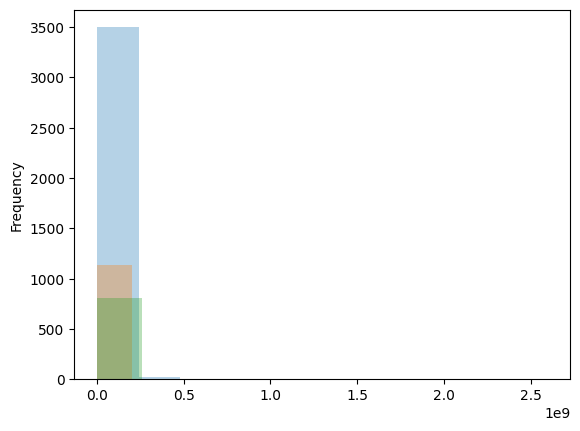

In [41]:
# Plot a histogram of the funding for each industry
biotech_df.funding_total_usd.plot(kind='hist', alpha=0.33)
enterprise_df.funding_total_usd.plot(kind='hist', alpha=0.33)
health_df.funding_total_usd.plot(kind='hist', alpha=0.33)
plt.show()

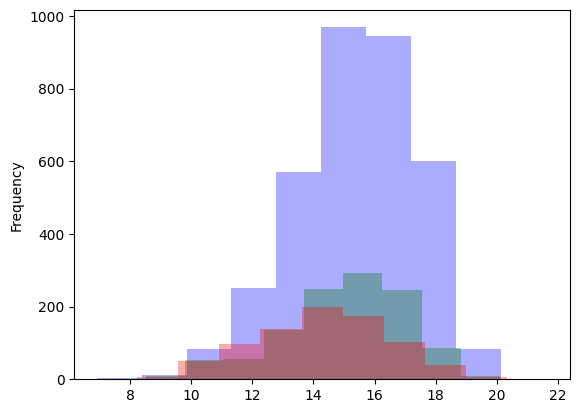

In [42]:
# Plot a histogram of the log funding for each industry
np.log(biotech_df['funding_total_usd']).plot(kind='hist', color='blue', alpha=0.33)
np.log(enterprise_df['funding_total_usd']).plot(kind='hist', color='green', alpha=0.33)
np.log(health_df['funding_total_usd']).plot(kind='hist', color='red', alpha=0.33)
plt.show()

Notice how the raw data was not remotely normal, and was heavily right-skewed. The log-transformation changed things drastically! Now all three appear at least approximately normal. If very high levels of precision were required, we could do an `Anderson` test for normality like we did earlier, but for the purposes of our analysis, a visual inspection is enough.

#### 2.3.3 ANOVA

In [43]:
biotech_log_funding = np.log(biotech_df['funding_total_usd'])
enterprise_log_funding = np.log(enterprise_df['funding_total_usd'])
health_log_funding = np.log(health_df['funding_total_usd'])

# Conduct a one-way ANOVA test to compare the log-funding
s, p_value = stats.f_oneway(biotech_log_funding, enterprise_log_funding,health_log_funding)

# Print if the p-value is significant at 5%
print(f'The p-value is: {p_value}')
print(f'Is the p-value less than 0.05 and therefore can we reject the null hypothesis? : {p_value<0.05}')

The p-value is: 2.3710546426329705e-44
Is the p-value less than 0.05 and therefore can we reject the null hypothesis? : True


Just by visual inspection, each market's mean funding was fairly close. It may be hard to know if those differences are due to true differences, or are just an artifact of working with a sample. By using a ANOVA test and properly checking all conditions we can be quite sure that the conclusion to **reject the null, and claim that differences are indeed due to the markets** is sound.

### 2.4 Non-parametric tests

Non-parametric tests *remove the assumption of normality* from our data, and thus are often more broadly applicable than parametric tests.  However, non-parametric tests often have lower `power`, meaning a lower chance of detecting an effect. Non-parametric tests are especially applicable in situations where our data takes on a ranked order, such as star ratings for restaurants, where the assumption of normality will almost never be satisfied.

There are many different non-parametric tests, just as there are many different parametric tests. You may have seen the `Wilcoxon-Mann-Whitney U` test, which is a non-parametric analogue of an independent sample t-test.

In addition, the `Kruskal-Wallis` test is a non-parametric analogue of an ANOVA test.

But what if your data consists of paired measurements, such as university rankings from different rankers? In that case, `Mood's median` test acts as a non-parametric analogue of a paired sample t-test. `t-tests` assume normality. If our data is not normal, then the results from a t-test are invalid. Mood's median test compares the medians from two paired measurements. 

In [44]:
university_rankings = pd.read_csv('data/university_rankings.csv')
university_rankings.head()

,University,thew_rank,arw_rank,cw_rank,thew_score,arw_score,cw_score
0,Harvard University,1,1,1,96.10,100.00,100.00
1,Stanford University,4,3,3,94.30,73.40,89.50
2,University of Cambridge,6,2,4,91.20,73.60,86.17
3,California Institute of Technology,2,6,5,96.00,67.10,85.21
4,Princeton University,5,8,6,94.20,60.90,82.50


When working with ranked, ordinal data, Pearson's correlation coefficient would not be the right tool for the job. Pearson's R assumes both sets of data are approximately **normally distributed**. 

With rankings, every value occurs only once, so it will never be normal! Instead, we can use `Kendall's tau` inside Scipy `stats.kendalltau()`. It takes values between negative one and one, where negative one indicates complete disagreement, one indicates complete agreement, and zero indicates no correlation. 

#### 2.4.1 Comparing rankings

A number of organizations rank universities on factors such as research, teaching, and student satisfaction, among other factors. Three such organizations include the Times Higher Education World (THEW) University Ranking, the Academic Ranking (ARW) of World Universities, and the Center for World (CW) University Rankings. However, it's common for these organizations to give different ranks for the same university. How can you quantitatively measure the agreement or disagreement between rankings? One approach is to use a non-parametric rank correlation coefficient such as Kendall's tau.

In [45]:
# Compute Kendall's tau between the THEW and ARW rankings
tau_thew_arw, p_value_thew_arw = stats.kendalltau(
    university_rankings['thew_rank'],
    university_rankings['arw_rank'])

# Compute Kendall's tau between the THEW and CW rankings
tau_thew_cw, p_value_thew_cw = stats.kendalltau(
    university_rankings['thew_rank'],
    university_rankings['cw_rank'])

# Compute Kendall's tau between the ARW and CW rankings
tau_arw_cw, p_value_arw_cw = stats.kendalltau(
    university_rankings['arw_rank'],
    university_rankings['cw_rank'])

In [46]:
print(tau_thew_arw, p_value_thew_arw)

0.6512525427983284 3.4570509197908455e-09


In [47]:
print(tau_thew_cw, p_value_thew_cw)

0.6623882222760947 1.8240211163900803e-09


In [48]:
print(tau_arw_cw, p_value_arw_cw)

0.7196922583826684 6.29019199828259e-11


> **The two organizations with the highest degree of agreement (tau score) were ARW and CW. Notice also this is reflected in the lower p-value.**

However, this is a two-tailed test, so if these two had a very high level of _disagreement_, the p-value would also be very low. 

Thus examining the `tau` score itself is important! Also, note that while you may have been tempted to use Pearson's R to measure correlation, since the data was ranked, inference based on Pearson's R likely would have been invalid! 

#### 2.4.2 Comparing medians

Parametric tests tend to compare means, while non-parametric tests tend to compare medians. This is because if your data is skewed, the mean may not be a good measure of central tendency, and you should work with the median instead.

Each of the university ranking organizations we just looked at also included a "total score" for each university. We'll start by determining if the scores are approximately `normal` by using a histogram. If they are not, you will perform a Mood's median test to compare their medians. 

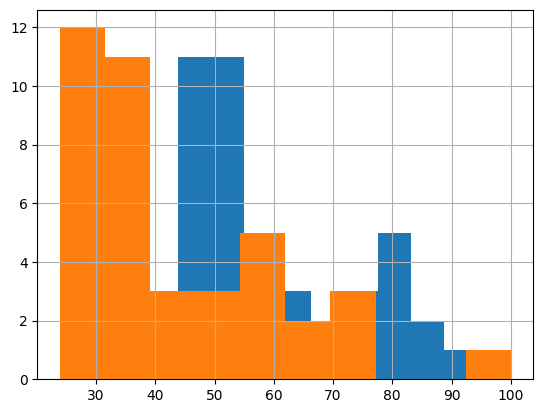

In [49]:
# Plot a histogram of the CW total score
university_rankings['cw_score'].hist()

# Plot a histogram of the ARW total score
university_rankings['arw_score'].hist()
plt.show()

In [50]:
# Conduct a Mood's median test comparing cw_score and arw_score
s, p_value, med, table = stats.median_test(university_rankings['cw_score'], university_rankings['arw_score'])

# Check if the p-value is significant at 5%
print(f' The s value is: {s}.')
print(f' The median value is: {med}.')
print(f' The p-value is: {p_value}.')
print(f' Is the p-value less than 0.05 and therefore we can reject the null hypothesis? : {p_value<0.05}.')

 The s value is: 11.25.
 The median value is: 50.620000000000005.
 The p-value is: 0.0007962301575908105.
 Is the p-value less than 0.05 and therefore we can reject the null hypothesis? : True.


Working with medians rather than means can be important if your data is skewed, such as you have here. While the means may or may not be equal, the means may not be representative of the center of your data. So making inference on them may not fully describe your data. In this case the data is most certainly not symmetric, as you saw far more universities with a ranking near 50 and a tail leading out to 100. 

> When you see a **skewed distribution**, this tells you that the **mean is likely not an ideal measure of central tendency**. 

## 3. Effect Size

While **p-values** tell you if a significant effect is present, they don't tell you how ***strong*** that effect is. **Effect size** is a measure of the strength of relationship between two variables. It's important to consider both factors when making inference.

### 3.1 Effect size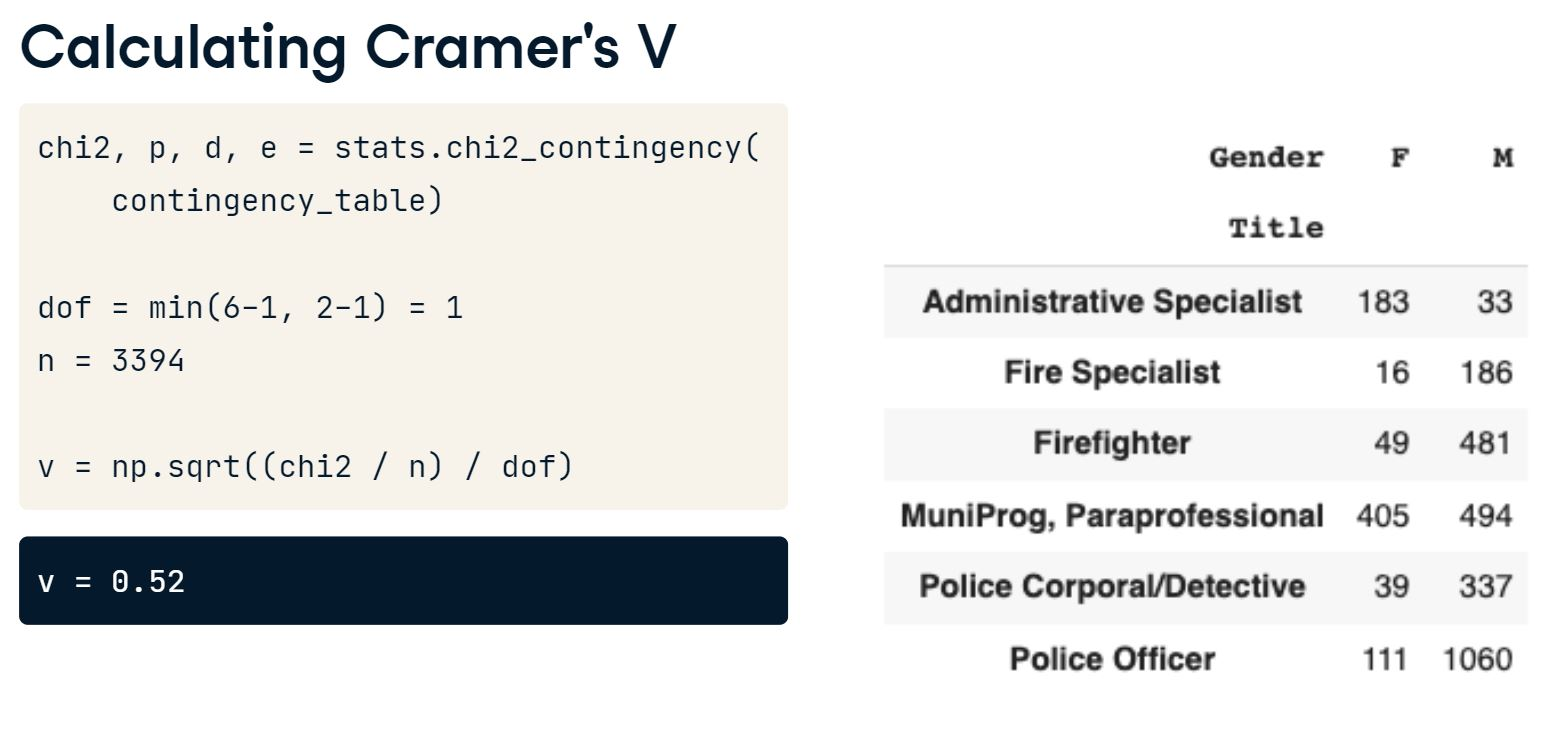

A common metric to measure standardized effect size between two sample means is **Cohen's d** which is defined as:

    the difference in the sample means divided by the pooled standard deviation. 
    
    
If we calculate Pearson's R and then square it we get **R-squared**, which is an effect size for correlation.  Recall that this value is the percent of the variation in one variable that is explained by knowing the other.

Effect size for **categorical** variables can be calculated using **Cramer's V**. We need the chi-squared test statistic from our data, as well as the total number of data points and degrees of freedom. Cramer's V is then defined by the equation shown :

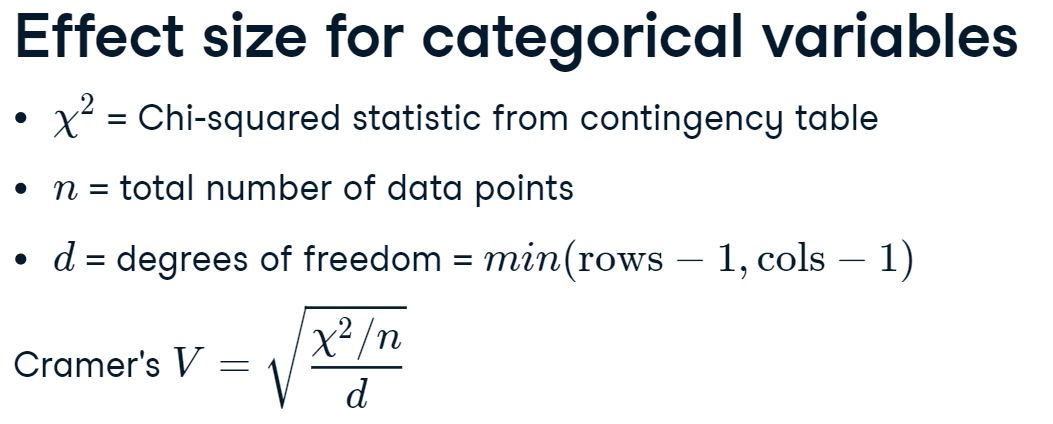

If we have a contingency table comparing gender and job title of employees, we can compute the chi-squared test statistic using the `chi2_contingency()` function. Then we can compute the degrees of freedom and the total number of observations to compute Cramer's V.


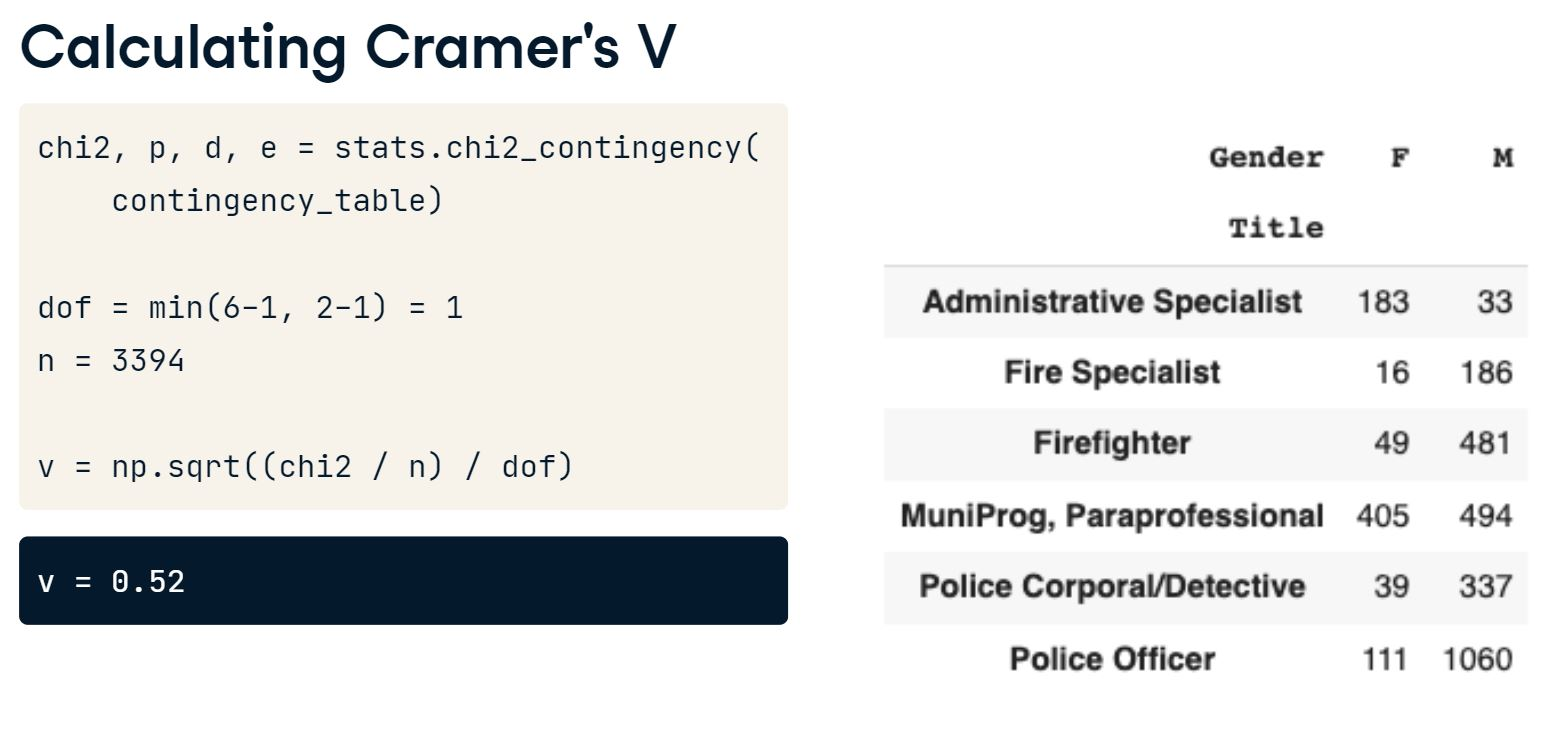


Cramer's V always returns a value between zero and one, with zero indicating no relationship and one indicating a perfect association. The interpretation uses both the degrees of freedom and the value of Cramer's V. 

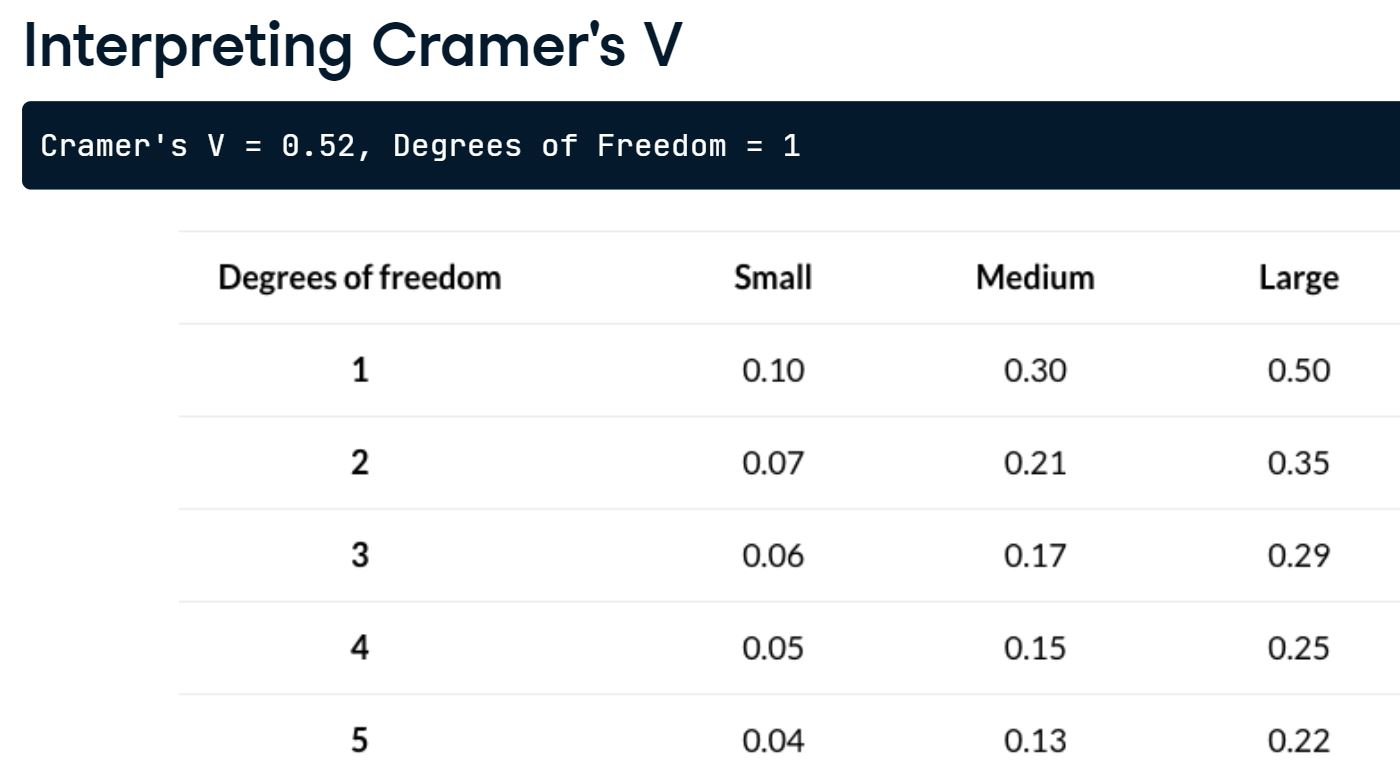

### 3.1.1 Effect size for means

Many venture capital-backed companies receive more than one round of funding. In general, the second round is bigger than the first. Just how much of an effect does the round number have on the average funding amount? You can use **Cohen's d** to quantify this.

Recall that, to calculate Cohen's d, you need to first calculate the ***pooled standard deviation***. That is given by the equation:

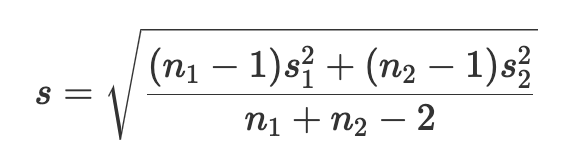

Cohen's d is then given by:

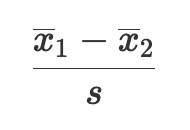


In [51]:
investments_df

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity,log_funding
0,Games,4000000,operating,USA,2,0,4000000,0,0,15.20
1,Software,7000000,NaN,USA,1,0,7000000,0,0,15.76
2,Advertising,4912393,closed,ARG,1,0,0,0,0,15.41
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0,14.51
4,Games,41250,operating,HKG,1,41250,0,0,0,10.63
...,...,...,...,...,...,...,...,...,...,...
23675,Biotechnology,2686600,operating,AUT,1,0,2686600,0,0,14.80
23676,Education,320000,operating,GBR,1,320000,0,0,0,12.68
23677,Enterprise Software,1587301,operating,CHN,1,0,1587301,0,0,14.28
23678,Games,9300000,operating,NaN,1,9300000,0,0,0,16.05


In [57]:
# Select all investments from rounds 1 and 2 separately
round1_df = investments_df[investments_df['funding_rounds'] == 1]
round2_df = investments_df[investments_df['funding_rounds'] == 2]

# Calculate the standard deviation of each round and the number of companies in each round
round1_sd = round1_df['funding_total_usd'].std()
round2_sd = round2_df['funding_total_usd'].std()
round1_n = round1_df.shape[0]
round2_n = round2_df.shape[0]

In [55]:
print(round1_sd)

68934238.31640184


In [58]:
print(round2_sd)

32115079.682891585


In [59]:
print(round1_n)

13355


In [60]:
print(round2_n)

5299


In [61]:
# Calculate the pooled standard deviation between the two rounds
pooled_sd = np.sqrt(((round1_n - 1) * round1_sd ** 2 + (round2_n - 1) * round2_sd ** 2) / (round1_n + round2_n - 2))
pooled_sd

60787554.68628332

In [65]:
# Calculate Cohen's d
d = (round1_df['funding_total_usd'].mean() - round2_df['funding_total_usd'].mean()) / pooled_sd
d

-0.07719192881235956

That's a surprisingly low value! That tells us that moving to a second round of funding does not in itself have a large effect on the amount of money raised. This is likely due to how large the standard deviations are, which means that the means are unreliable estimates.

#### 3.1.2 Effect size for correlations

The volatility of an asset is roughly defined by how much its price changes. In this example we will measure volatility on a per-day basis, defined as the (high price - low price) / closing price.

- What factors explain the volatility of Bitcoin? 
- Is the volatility of the S&P500 closely related to this? 
- Does volatility increase or decrease as prices rise? In other words, what is the effect size of the correlation between these different factors?

In [66]:
btc_sp_df.head()

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500
0,2017-08-07,3212.78,3397.68,3180.89,3378.94,2480.91,2477.14,2480.95,2475.88
1,2017-08-08,3370.22,3484.85,3345.83,3419.94,2474.92,2478.35,2490.87,2470.32
2,2017-08-09,3420.40,3422.76,3247.67,3342.47,2474.02,2465.35,2474.41,2462.08
3,2017-08-10,3341.84,3453.45,3319.47,3381.28,2438.21,2465.38,2465.38,2437.75
4,2017-08-11,3373.82,3679.72,3372.12,3650.62,2441.32,2441.04,2448.09,2437.85


In [67]:
# Compute the volatility of Bitcoin
btc_sp_df['Volatility_BTC'] = (btc_sp_df['High_BTC'] - btc_sp_df['Low_BTC']) / btc_sp_df['Close_BTC']

# Compute the volatility of the S&P500
btc_sp_df['Volatility_SP500'] = (btc_sp_df['High_SP500'] - btc_sp_df['Low_SP500']) / btc_sp_df['Close_SP500']

In [70]:
# Compute and print R^2 between the volatility of BTC and SP500
r_volatility, p_value_volatility = stats.pearsonr(btc_sp_df['Volatility_BTC'], btc_sp_df['Volatility_SP500'])
print('R^2 between volatility of Bitcoin and the SP500:', r_volatility ** 2)

R^2 between volatility of Bitcoin and the SP500: 0.03152987723111431


In [72]:
# Compute and print R^2 between the volatility of BTC and the closing price of BTC
r_closing, p_value_closing = stats.pearsonr(btc_sp_df['Volatility_BTC'], btc_sp_df['Close_BTC']) 
print('R^2 between closing price of BTC and volatility of BTC:', r_closing ** 2)

R^2 between closing price of BTC and volatility of BTC: 0.01252065913517721


Neither the volatility of the S&P 500 nor the closing price of BTC has a large correlation with the volatility of BTC.  However, we still learn something from the correlations! We can see that the `volatility of the S&P 500` explains about `3%` of the variation of volatility of BTC, while the `closing price of BTC` explains about `1%`. 

Therefore, price swings in BTC aren't simply related to price swings in the S&P 500, nor in the price of BTC being especially high/low. These sorts of quantitative assessments are important to conduct.

> While examining things like line graphs and scatter plots can help you gain an intuitive understanding of the data, rigorous statistical tests are a necessity. They take beyond *'I feel like...'* and towards **'The data shows that...'**. These tools are key in principled decision making.

#### 3.1.3 Effect size for categorical variables

We saw in the City of Austin employee data that job titles have an unequal distribution of genders. But does the same thing hold for ethnicities? And to what extent does ethnicity relate to the job title chosen? In this exercise we will dig in and answer that question.

In [76]:
employees = pd.read_csv('data/employees.csv')
employees

,Title,Asian,Black or African American,Hispanic or Latino,White
0,Administrative Specialist,5,34,99,78
1,Fire Specialist,8,9,36,149
2,Firefighter,5,37,127,361
3,"MuniProg, Paraprofessional",37,142,227,493
4,Police Corporal/Detective,5,31,77,263
5,Police Officer,34,86,263,788


In [79]:
employees_df = pd.pivot_table(employees, index=['Title'], values=['Asian', 'Black or African American', 'Hispanic or Latino', 'White'])
employees_df

,Asian,Black or African American,Hispanic or Latino,White
Title,,,,
Administrative Specialist,5.00,34.00,99.00,78.00
Fire Specialist,8.00,9.00,36.00,149.00
Firefighter,5.00,37.00,127.00,361.00
"MuniProg, Paraprofessional",37.00,142.00,227.00,493.00
Police Corporal/Detective,5.00,31.00,77.00,263.00
Police Officer,34.00,86.00,263.00,788.00


In [80]:
# Compute the chi-squared statistic
chi2, p, d, expected = stats.chi2_contingency(employees_df)

# Compute the Degress of Freesom (DOF) using the number of rows and columns
dof = min(employees_df.shape[0] - 1, employees_df.shape[1] - 1)

# Compute the total number of people
n = np.sum(employees_df.values)

# Compute Cramer's V
v = np.sqrt((chi2 / n) / dof)

print("Cramer's V:", v, "\nDegrees of freedom:", dof)

Cramer's V: 0.12902342923732754 
Degrees of freedom: 3


While a chi-squared test can test for association between two categorical variables, it doesn't directly answer the question of the degree of association. By computing an effect size like Cramer's V, we can directly measure the effect that one variable has on the other.

We can conclude based on the above results, and with reference to the following table, that:

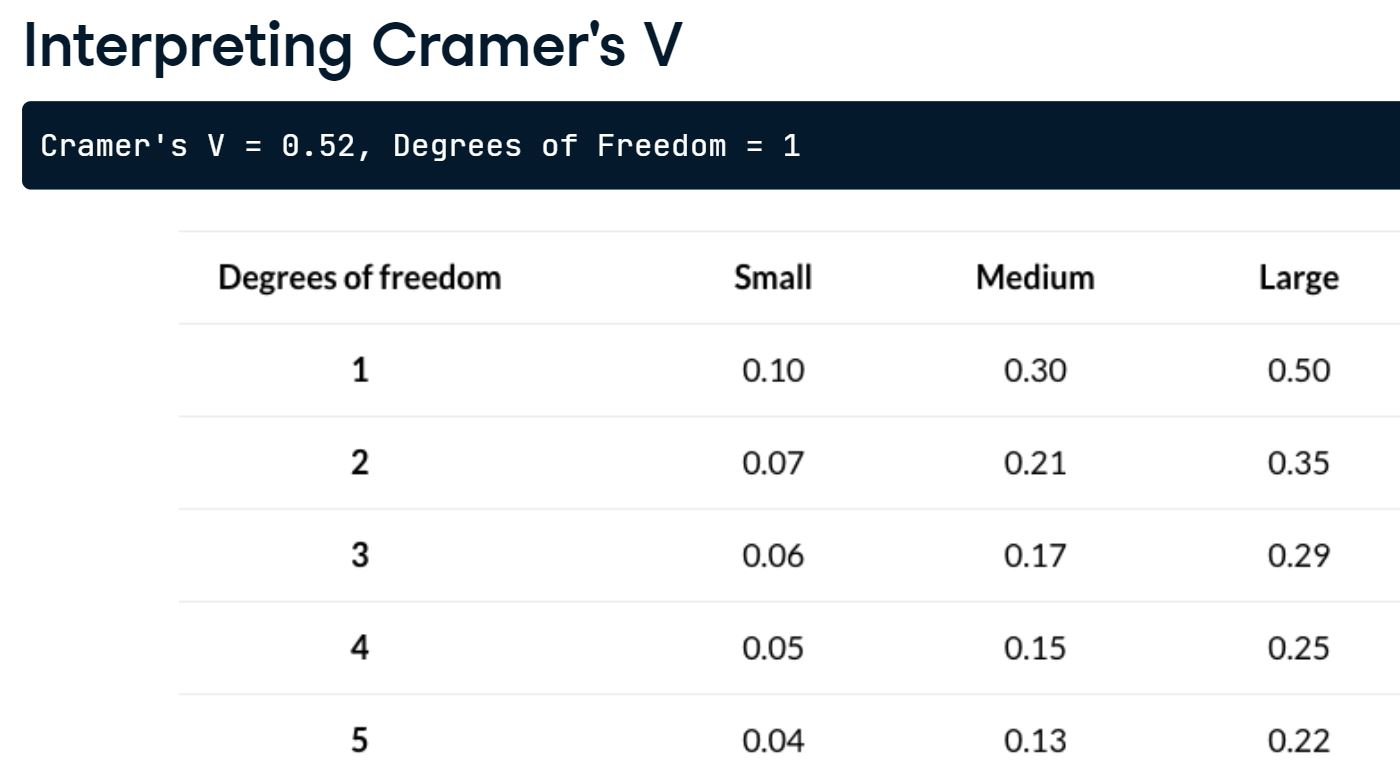

> ethnicity has a **moderate effect** on the job title a person holds

Unlike R-squared, Cramer's V doesn't have an easy interpretation. But by knowing the degrees of freedom you can get a general feel for how large or small an effect one categorical variable has on another. Here you see that job title and ethnicity are certainly related, but not directly linked. This might lead you to search for what other factors are influencing the job a person gets.

### 3.2 Multiple comparisons and corrections


Often, when we conduct several inferences or tests simultaneously, the probability of detecting an effect that is not in fact present increases. Let's explore what this means.

There's nothing wrong with making multiple comparisons. The problem however arises from alpha. Remember that in a hypothesis test our p-value measures how likely a result is to occur at random. If a highly unlikely result occurs, it raises our suspicion, and makes us consider if something in our experiment caused that result. Such as a very high number of people getting better after taking our treatment, which causes us to suspect that our treatment is what did it. 

Alpha is the cutoff for how strong this evidence needs to be before we reject the null. But when we make many comparisons, we increase the probability of finding results which demonstrate a strong relationship, even if it's only due to random chance!

A common fix is to make alpha smaller! This is precisely what the **Bonferonni-Holm correct**, or Bonferonni correction for short, does. It takes our value of alpha, normally five percent, and divides it by the number of comparisons we are making. For example, suppose we wanted to compare all fifty variables in our data against a target variable of our customer's purchase decision. Since we will be making fifty comparisons, the Bonferonni correction asks us to divide our choice of alpha by fifty. This gives a corrected alpha of zero-point-zero-zero-one, a reduced probability of detecting a significant result by chance.

#### 3.2.1 Multiple comparisons problem

In [ ]:
# Compute number of rows and initialize n_significant
n_rows = police_salaries_df.shape[0]
n_significant = 0

# For loop which generates n_rows random numbers 1000 times
for i in range(1000):
  random_nums = np.random.uniform(size=n_rows)
  # Compute correlation between random_nums and police salaries
  r, p_value = stats.pearsonr(police_salaries_df['Annual Salary'], random_nums)

  # If the p-value is significant at 5%, increment n_significant
  if p_value < 0.05:
    n_significant += 1
    
print(n_significant)

Notice how about 46 out of 1000, or 4.6%, of the results were significant. This is not a coincidence! Our cutoff for significance was 5%, meaning about 5% of the time a random correlation will cross this threshold. This clearly demonstrates the problem with repeatedly running experiments and assuming that low p-values indicate something meaningful.

#### 3.2.2 Bonferonni-Holm correction

WE've seen that comparing many different datasets, even randomly generated ones, can result in "statistically significant relationships" that are anything but! One way around this is to apply a correction to the alpha of our confidence level. In this example we will explore why we should apply this correction and how to do so.

In [ ]:
# Compute the Bonferonni-corrected alpha
bonf_alpha = 0.05/1000

# Check how many p-values were significant at this level
print(sum(p_values<bonf_alpha))

What a drastic change from the last example. Previously we had 46 spurious correlations (around 5%) being detected. Now we have none. This means that the bar for what is significant has been raised drastically. This helps reduce the chance of spurious correlations being marked at significant.

> **The Bonferonni-Holm correction reduces the probability of rejecting the null proportional to the number of experiments performed.**

> **You should use the Bonferonni-Holm correction any time you wish to make many different comparisons to perform inference.**

### 3.3 Power of a test

We'd like experiments to have:

- Large sample sizes
- a treatment with a big impact
- and a reasonable significance level, meaning neither too big nor too small. 

Together, these three factors will influence the outcome of an experiment.

> When designing an experiment, it's best to calculate power **before** collecting a sample.

Imagine a weight loss study where the treatment group participates in exercise, and the control group does nothing. We then measure the weight loss for each group. Suppose the control group has no weight loss on average, with a standard deviation of one pound. The treatment group has an average weight loss of two pounds with the same standard deviation. We can simulate normal data like this:

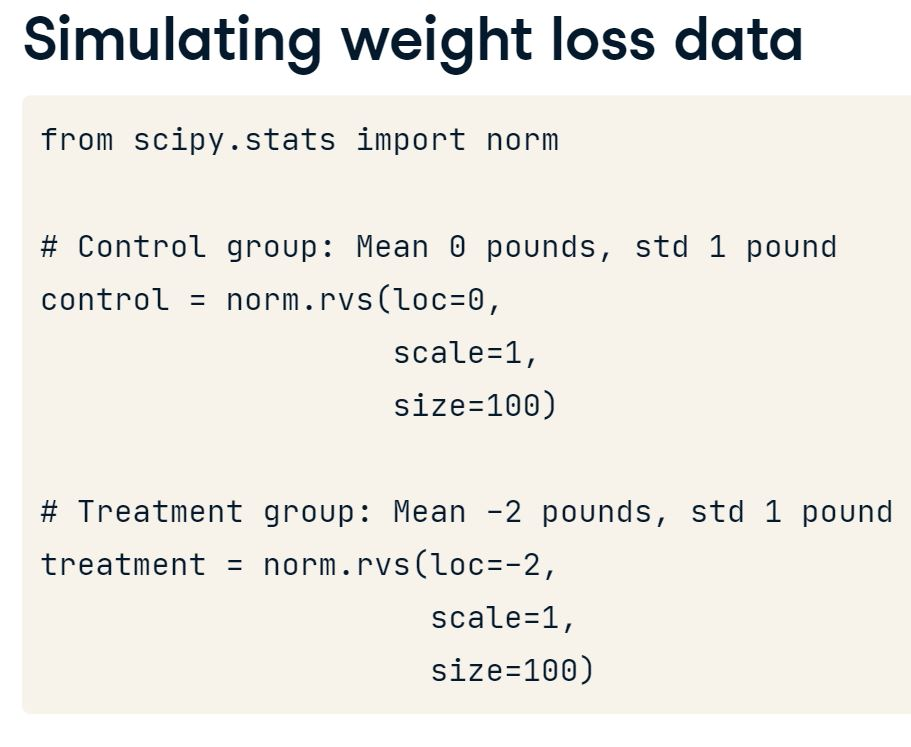

by calling `norm.rvs()`, from SciPy. We provide the control group **mean** by setting **loc equal to zero**, the **standard deviation** by setting **scale** equal to one, and the sample size by setting size equal to 100.

In this case, we know that the two groups have different mean weight loss, because we picked the values in our simulations! If the null hypothesis is that there is no difference in weight loss between the groups, we know that is wrong. The correct conclusion is that the treatment group had more weight less than the control group. If we use this data in a two-sample t-test, will our test come to that conclusion? Here we conduct a t-test and see that the test did in fact reject the null in favor of the alternative. The test came to the correct conclusion.

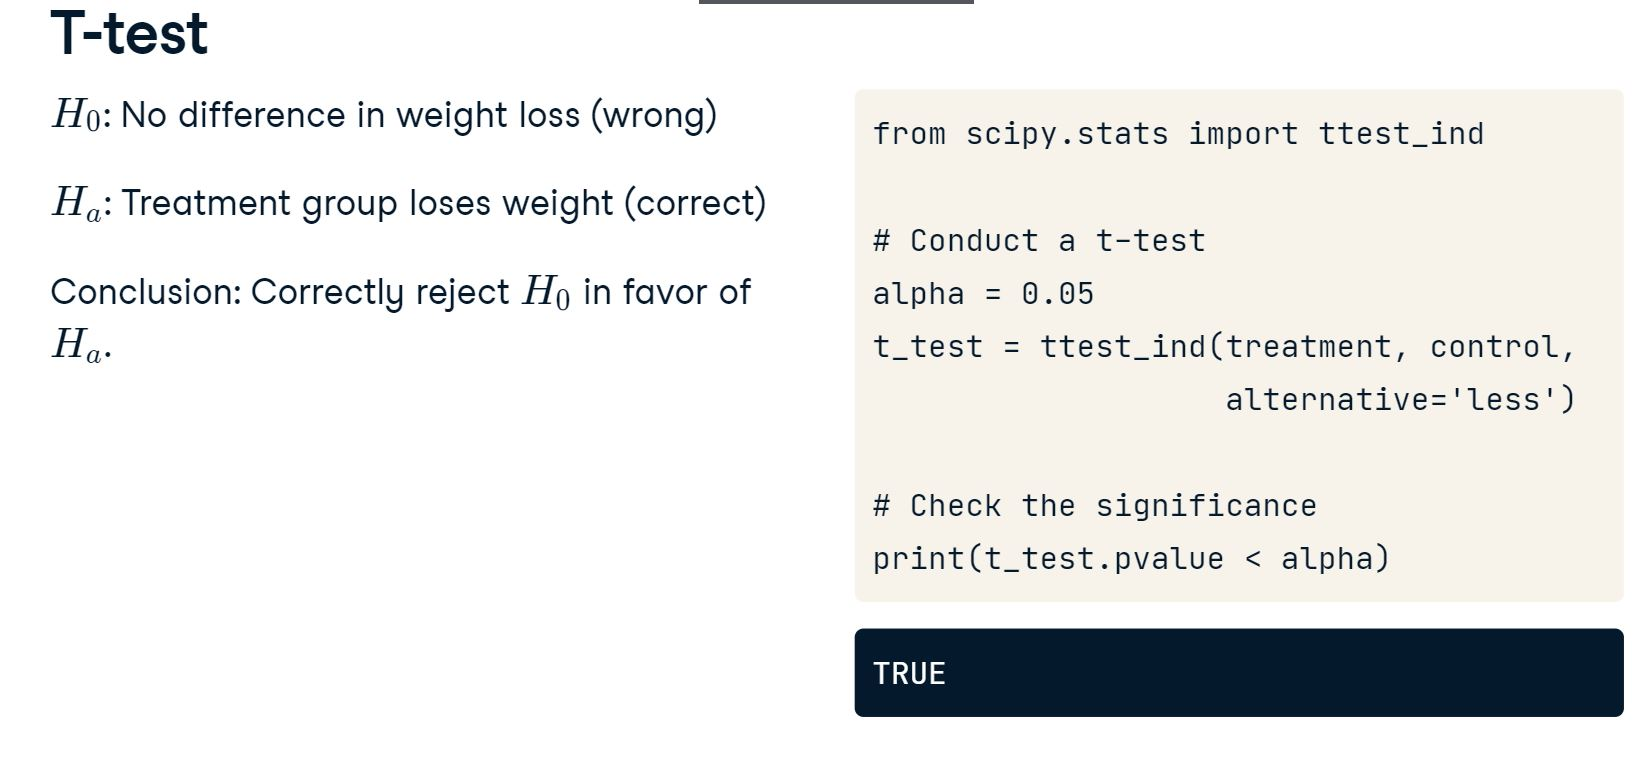

What if instead of 100 people, we had just five people in each group? 

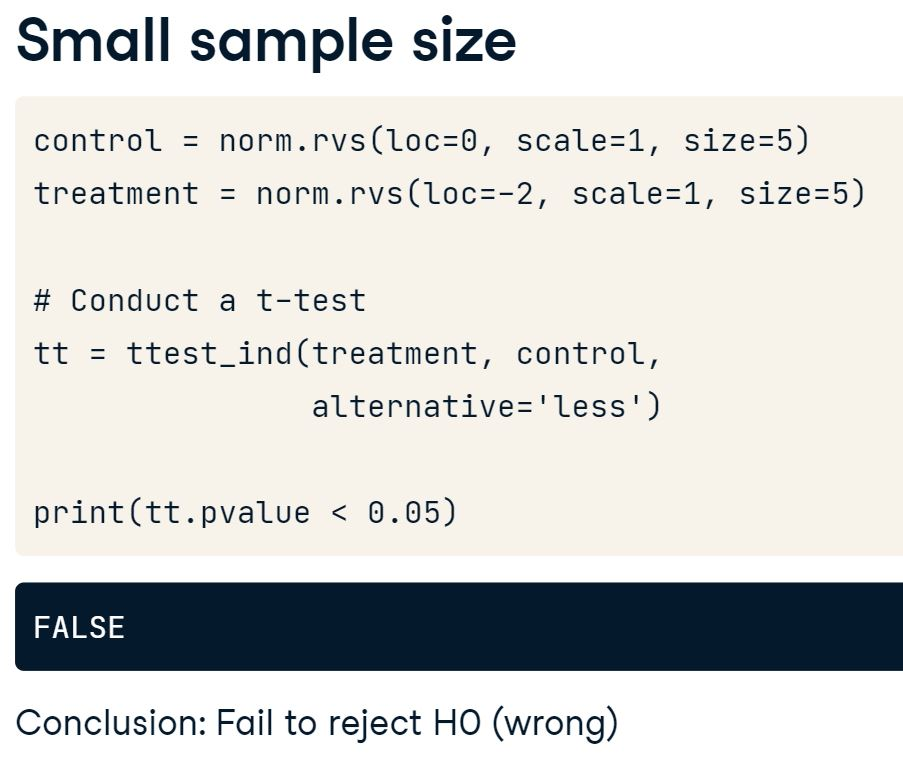

In this case, our test incorrectly fails to reject the null. That is because our sample size is too small.

What if the weight loss was zero-point-two pounds?

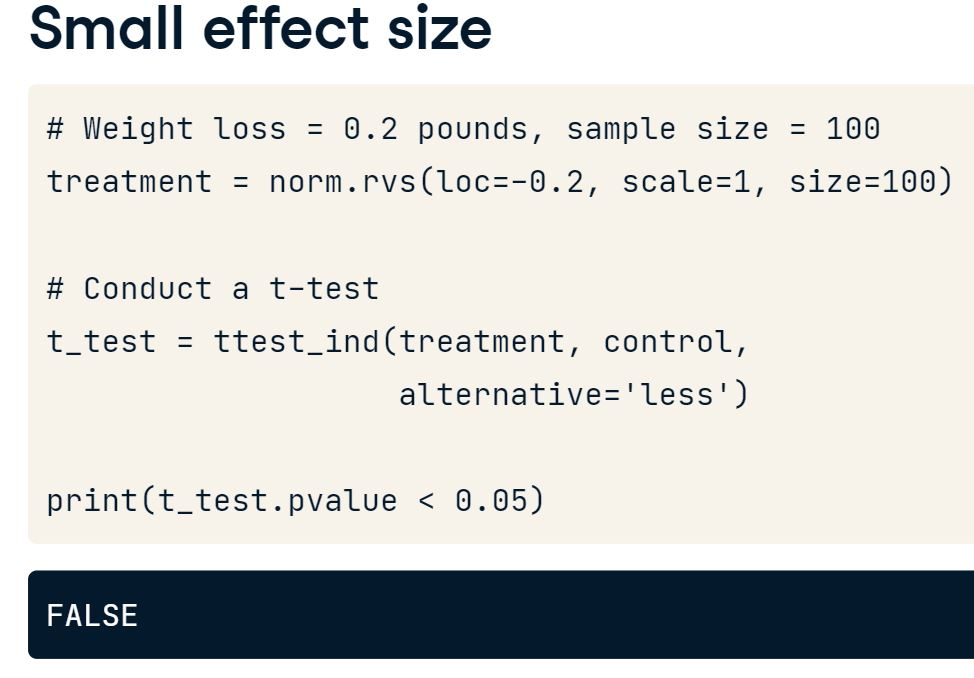

The problem is that our effect size is too small for our sample size and significance level. By increasing our sample size we can combat the small effect size.

Statsmodels has different functions for calculating power in different tests. Since this is a t-test with independent samples we use the `TTestIndPower()` function.

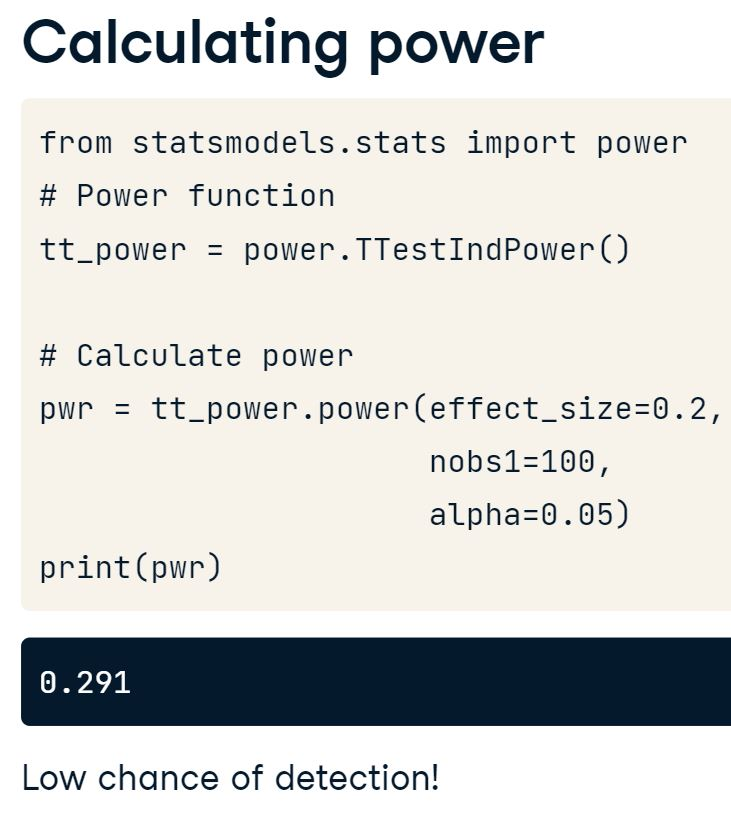

Power is important when making inference, because it helps us determine just how likely we are to detect a significant effect, if one exists.

We can also solve for any one missing parameter using the `solve_power()` function. For example if we wish to know how big our sample needs to be to have an effect_size of -0.2, a significance level of 5% and power of 0.8 :

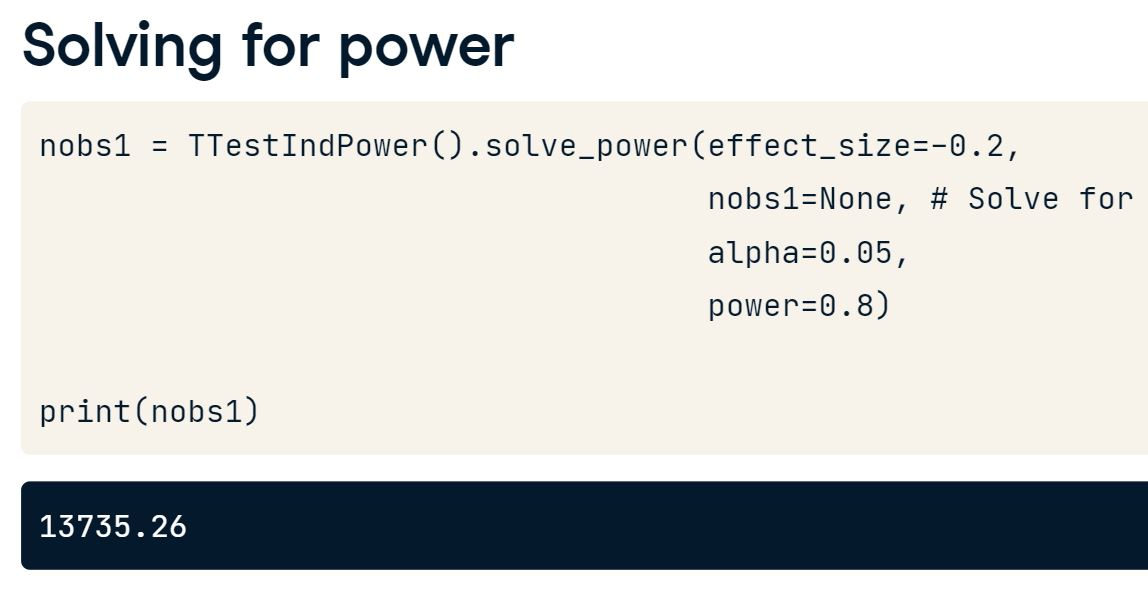

`Interpretation of results`

> The marketing campaign does work, and customers exposed to it buy more. This would be the case even if we interviewed every possible customer (population) : **Population means differ**

> The marketing campaign does increase customer spending, and a sample of customers used in a hypothesis test gives this correct conclusion: **test detects a difference**

> The marketing campaign works, but our sample is small, so there is only a low chance that a hypothesis test would detect it: **test has lower power**

#### 3.3.1 Power for experimental design

The order which best helps you choose a sample which is likely to produce a power you are happy with is shown below :

- Start by determining a desired power
- Research effect sizes seen in similar situations, or estimate a realistic effect size 
- Estimate the sample size needed to achieve the desired power at a given confidence level and effect size using the statsmodel function power()
- Collect a smaple of data using the parameters determined in power analysis
- Conduct the desired hypothesis test to test for significance    

#### 3.3.2 Computing power and sample sizes

We want to compare average funding per investment round for games companies versus advertising companies. Let's begin by computing the power of a two sample t-test.

In [86]:
investments_df

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity,log_funding
0,Games,4000000,operating,USA,2,0,4000000,0,0,15.20
1,Software,7000000,NaN,USA,1,0,7000000,0,0,15.76
2,Advertising,4912393,closed,ARG,1,0,0,0,0,15.41
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0,14.51
4,Games,41250,operating,HKG,1,41250,0,0,0,10.63
...,...,...,...,...,...,...,...,...,...,...
23675,Biotechnology,2686600,operating,AUT,1,0,2686600,0,0,14.80
23676,Education,320000,operating,GBR,1,320000,0,0,0,12.68
23677,Enterprise Software,1587301,operating,CHN,1,0,1587301,0,0,14.28
23678,Games,9300000,operating,NaN,1,9300000,0,0,0,16.05


In [99]:
# Filtering the dataframe
advertising_df = investments_df.loc[(investments_df['market'] == 'Advertising') & (investments_df['status'] == 'acquired')]
advertising_df

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity,log_funding
504,Advertising,10000000,acquired,USA,1,0,10000000,0,0,16.12
531,Advertising,119191000,acquired,USA,7,0,119175000,0,0,18.60
565,Advertising,470000,acquired,USA,2,0,0,0,0,13.06
579,Advertising,27000000,acquired,USA,2,0,27000000,0,0,17.11
583,Advertising,1550000,acquired,USA,2,0,1550000,0,0,14.25
...,...,...,...,...,...,...,...,...,...,...
21034,Advertising,31700000,acquired,USA,2,0,31700000,0,0,17.27
21377,Advertising,31000000,acquired,NaN,5,0,26000000,0,0,17.25
22034,Advertising,289998,acquired,USA,1,0,289998,0,0,12.58
22376,Advertising,13075000,acquired,USA,4,0,13075000,0,0,16.39


In [101]:
ads_acquired_avg_funding = advertising_df['funding_total_usd'] / advertising_df['funding_rounds']
ads_acquired_avg_funding

504     10000000.00
531     17027285.71
565       235000.00
579     13500000.00
583       775000.00
            ...    
21034   15850000.00
21377    6200000.00
22034     289998.00
22376    3268750.00
23056   10000000.00
Length: 115, dtype: float64

In [100]:
# Filtering the dataframe
games_df = investments_df.loc[(investments_df['market'] == 'Games') & (investments_df['status'] == 'acquired')]
games_df

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity,log_funding
168,Games,3987693,acquired,KOR,2,3987693,0,0,0,15.20
793,Games,27500000,acquired,USA,1,0,27500000,0,0,17.13
910,Games,816000,acquired,DEU,1,816000,0,0,0,13.61
1542,Games,6000000,acquired,FIN,2,2000000,4000000,0,0,15.61
1767,Games,12000000,acquired,USA,1,0,12000000,0,0,16.30
...,...,...,...,...,...,...,...,...,...,...
22461,Games,3500000,acquired,USA,2,0,3500000,0,0,15.07
22953,Games,7000000,acquired,NaN,1,0,7000000,0,0,15.76
23126,Games,7000000,acquired,USA,2,0,7000000,0,0,15.76
23350,Games,11500000,acquired,USA,2,0,11500000,0,0,16.26


In [102]:
games_acquired_avg_funding = games_df['funding_total_usd'] / games_df['funding_rounds']
games_acquired_avg_funding

168      1993846.50
793     27500000.00
910       816000.00
1542     3000000.00
1767    12000000.00
            ...    
22461    1750000.00
22953    7000000.00
23126    3500000.00
23350    5750000.00
23393     950000.00
Length: 99, dtype: float64

In [90]:
advertising_df.status.value_counts()

status
operating    693
acquired     115
closed        74
Name: count, dtype: int64

In [105]:
from statsmodels.stats.power import TTestIndPower

In [109]:
ads_games_cohensd = 0.03380764912794999 # Cohen's d (standardized effect size) for advertising versus games company's

ads_n = len(ads_acquired_avg_funding)
games_n = len(games_acquired_avg_funding)

# Compute the ratio of games to advertising companies
games_ads_ratio = games_n / ads_n

# Compute the power of the test
TTestIndPower().power(effect_size=ads_games_cohensd, 
            nobs1=ads_n,
            alpha=0.05,
            ratio=games_ads_ratio)

0.05693109886858502

In [110]:
# Solve for the sample size needed to achieve a power of 80%
nobs1 = TTestIndPower().solve_power(effect_size=ads_games_cohensd, 
            nobs1=None,
            alpha=0.05,
            power = 0.8)

# Print the number of participants needed in one group
print(nobs1)

13735.26481181223


Leveraging `solve_power()` we have identified that we need nearly 14,000 participants in each group! While much of the techniques we've learned so far focus on simply running a test and hoping for the best, power analysis allows us to understand just how likely our test is to be successful.

## 4. Simulation, Randomization, and Meta-Analysis

We'll expand our inferential statistics toolkit further with a look at bootstrapping, permutation tests, and methods of combining evidence from p-values. Bootstrapping will provide us with a first look at statistical simulation. Meta-analysis involces combining results from multiple studies. We will finish up with a look at permutation tests, a powerful and flexible non-parametric statistical tool.

### 4.1 Bootstrapping

`Bootstrapping`, which is sampling with replacement, is a common statistical technique. 

We start with a dataset, randomly choose a sample, write it down, put it back in the data, and repeat. This is called a bootstrapped sample. We can imagine having a group of people and asking them to rate their experience at an event on a scale from zero to ten. We ask someone, record their answer, and go ask again. It's possible we may ask the same person twice, but that's ok.

For the purposes of inference, our primary interest in bootstrapping is creating `bootstrapped confidence intervals`, which is a non-parametric analogue of the confidence intervals that assume normality. A bootstrapped confidence interval is formed by taking a bootstrap sample, computing some test statistic, such as a mean, recording this, and repeating this process many times. In doing so we build an empirical distribution of outcomes.

Bootstrapped confidence intervals are commonly used to compute a confidence interval for the mean. However, bootstrapping can be used with any statistic we like! To illustrate let's look at spread :

In [114]:
salary_df['Years of Employment']

0     11
1     11
2     15
3     12
4     24
5     17
6     17
7     15
8     18
9     15
10    18
11     6
12    24
13    15
14     7
15    11
16    13
17    17
18    15
19     7
20    17
21    15
22    22
23    13
24    15
25    18
26    18
27    17
28    27
29    18
30    17
31    17
32    18
33    25
34     7
35    24
Name: Years of Employment, dtype: int64

In [116]:
# generate a random sample of 10 
sample_1 = salary_df['Years of Employment'].sample(n=10)
print(max(sample_1) - min(sample_1))

18


If we repeat this process many times we form a sampling distribution. By then taking the middle 95 percent of outcomes, we could form a bootstrapped 95% confidence interval. We can leverage `SciPy` to do the heavy lifting :


In [128]:
# Statistic function
def max_min(x):
    return max(x) - min(x)

# Data as a tuple
data = (salary_df['Years of Employment'],)

# calculate bootstrapped confidence interval
bootstrap_ci = stats.bootstrap(data, max_min,
                               vectorized=False,
                               n_resamples=1000)

bootstrap_ci

BootstrapResult(confidence_interval=ConfidenceInterval(low=20.0, high=21.0), bootstrap_distribution=array([21, 21, 19, 20, 21, 19, 21, 21, 20, 21, 21, 21, 21, 20, 20, 21, 21,
       21, 21, 21, 18, 21, 18, 20, 19, 18, 21, 18, 20, 18, 19, 18, 19, 19,
       17, 21, 18, 20, 21, 19, 20, 18, 21, 20, 21, 21, 21, 21, 19, 17, 21,
       18, 19, 20, 20, 19, 21, 17, 20, 21, 21, 21, 20, 20, 21, 21, 19, 19,
       19, 21, 19, 20, 21, 21, 19, 19, 21, 21, 19, 21, 21, 21, 20, 21, 21,
       18, 20, 20, 17, 21, 19, 18, 19, 21, 21, 20, 20, 21, 21, 18, 20, 21,
       18, 21, 21, 19, 21, 20, 21, 13, 19, 21, 18, 20, 19, 20, 21, 18, 21,
       21, 19, 18, 21, 21, 21, 18, 18, 20, 18, 18, 21, 21, 19, 18, 20, 21,
       19, 21, 20, 21, 21, 19, 20, 21, 21, 21, 20, 20, 21, 18, 20, 21, 20,
       20, 21, 21, 18, 21, 21, 21, 19, 19, 21, 19, 17, 20, 21, 19, 21, 18,
       21, 20, 21, 19, 21, 21, 19, 17, 21, 21, 18, 19, 21, 18, 20, 21, 20,
       19, 18, 18, 19, 20, 19, 18, 16, 21, 21, 20, 18, 19, 20, 19, 18, 21,


This returns the confidence interval for the experience ranges, as well as the standard error.

Bootstrapped confidence intervals are not better or worse than confidence intervals that assume normality, just different.  Normal confidence intervals require data to be normally distributed, make their computations based solely on the mean and standard error, make valid inference only for normally distributed data, but are very fast to compute.

Bootstrapped confidence intervals, on the other hand work for any data, are computed directly from the data by resampling, allow for valid inference with any data, but are much slower to compute. Because of these differences, if our data is *normally distributed*, a *normal confidence interval* should be our first choice. 

However, when working with non-normal data, such as *ranked data or skewed data*, ***bootstrapped confidence intervals*** are a great choice. In addition, normal confidence intervals sometimes returns nonsensical values, like negative years of experience.

#### 4.1.1 Bootstrap confidence intervals

We saw previously that there is some degree of correlation between the S&P 500 and Bitcoin. One way to measure this would be to look at the correlation coefficient Pearson's R between the two. However, doing so results in only a **point estimate**. Presumably, at some points in time the correlation between the two is quite close, while at other times they behave very differently. 

How can we characterize the variability? One approach is to create a bootstrap confidence interval for the correlation coefficient between the two.

In [126]:
# Compute the daily percent change of each asset
btc_sp_df['Pct_Daily_Change_BTC'] = (btc_sp_df['Open_BTC'] - btc_sp_df['Close_BTC']) / btc_sp_df['Open_BTC']
btc_sp_df['Pct_Daily_Change_SP500'] = (btc_sp_df['Open_SP500'] - btc_sp_df['Close_SP500']) / btc_sp_df['Open_SP500']

# Write a function which returns the correlation coefficient
def pearson_r(x, y):
    return stats.pearsonr(x,y)[0]
  
# Compute a bootstrap confidence interval
ci = stats.bootstrap((btc_sp_df['Pct_Daily_Change_BTC'], btc_sp_df['Pct_Daily_Change_SP500']),
                     statistic=pearson_r, 
                     vectorized=False, paired=True, n_resamples=1000, random_state=1)

print(ci.confidence_interval)

ConfidenceInterval(low=0.1797054193594902, high=0.34392714265260166)


> **95% of the time, the correlation between the daily change in the two assets is between about 18% and 34%**

By working with a bootstrap confidence interval we were able to take the correlation coefficient and make inference on its range. We now know not just a single value for the correlation, but rather what ***range of values*** we are likely to encounter!

#### 4.1.2 Bootstrapping vs. normality

What about common situations like making a confidence interval for a mean? Why would you use a bootstrap confidence interval over a "normal" confidence interval coming from `stats.norm`?

In [129]:
analytics_df

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity,log_funding
12,Analytics,1250000,acquired,USA,2,750000,500000,0,0,14.04
244,Analytics,1412834,operating,FRA,1,1412834,0,0,0,14.16
246,Analytics,500000,acquired,USA,1,0,500000,0,0,13.12
289,Analytics,20000000,operating,USA,1,0,20000000,0,0,16.81
321,Analytics,8500000,operating,USA,2,0,8500000,0,0,15.96
...,...,...,...,...,...,...,...,...,...,...
23479,Analytics,27138500,closed,USA,6,0,20638500,0,0,17.12
23506,Analytics,112000000,operating,USA,3,0,112000000,0,0,18.53
23527,Analytics,162954,operating,CHN,1,0,0,0,0,12.00
23592,Analytics,2388400,acquired,FIN,1,0,2388400,0,0,14.69


In [135]:
# Confidence interval using the stats.norm function
norm_ci = stats.norm.interval(confidence=0.95,
                         loc=analytics_df['private_equity'].mean(),
                         scale=analytics_df['private_equity'].std() / np.sqrt(len(analytics_df)))                             


(-695062.1822300977, 4049988.4410101348)


In [136]:
# Construct a bootstrapped confidence interval
bootstrap_ci = stats.bootstrap(data=(analytics_df['private_equity'], ), # needs to be a tuple - leave 2nd value blank
                              statistic=np.mean)

In [137]:
print('Normal CI:', norm_ci)
print('Bootstrap CI:', bootstrap_ci.confidence_interval)

Normal CI: (-695062.1822300977, 4049988.4410101348)
Bootstrap CI: ConfidenceInterval(low=314327.7034943, high=7312767.163785863)


These two return quite different results, even though they're estimating the same thing! The primary reason for the difference is that the mean is relatively small and spread out, so the standard error is large. That causes the **normal confidence interval** to contain **negative values**.

> **Since the average private equity funding cannot be negative, conclusions from this confidence interval are questionable.**

While the SciPy function `stats.norm.interval()` will gladly return a confidence interval for us, that doesn't mean inference drawn from it is valid! The primary issue is that the data is heavily right-skewed (non-normal), with the vast majority of companies (96.8%!) having no private equity funding.

> **The bootstrap confidence interval is created by sampling from the original data, which does not contain negative values.**

The bootstrap confidence interval is also quite broad, spanning roughly seven million dollars! However, this reflects the fact that the private equity funding is highly variable, with one company receiving over six hundred million dollars! And yet, the bootstrap confidence interval avoided negative values and only returned plausible values

### 4.2 Combining evidence from p-values

**Meta analysis** is a popular statistical technique where results from many studies are combined. Key to this is understanding how to make inference based on multiple p-values coming from different samples, but testing the same hypothesis.

It's reasonable to expect that different studies would get different p-values. But is it also reasonable to expect that different studies would come to completely different conclusions? 

Surprisingly enough, this is a reasonable outcome! The reason is related to samples. Recall that the outcome of any hypothesis test is completely dependent on the sample collected. 

What **Fisher's method** does is let us take many different studies, each studying the same null hypothesis, and test if at least one of the studies should have rejected the null hypothesis. It does so by looking at all of the p-values together as a single piece of evidence. 

To use Fisher's method in SciPy, we use the `stats.combine_pvalues()` function :

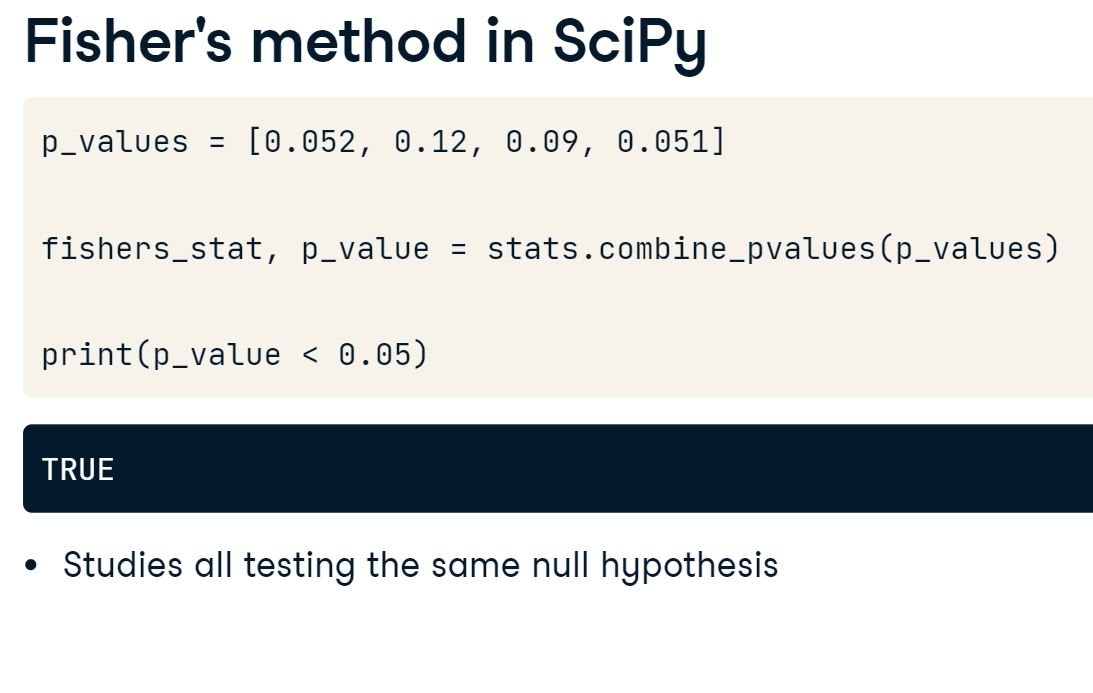

By using Fisher's method in this case we conclude that at least one of the studies should indeed have rejected the null hypothesis. Thus we can conclude that, while no test individually showed statistical significance, the combination of evidence from all of the tests suggest there is indeed a significant effect present.

Contrast that with the case where one study had a low p-value of zero-point-zero-one, and yet all others had significantly larger p-values.

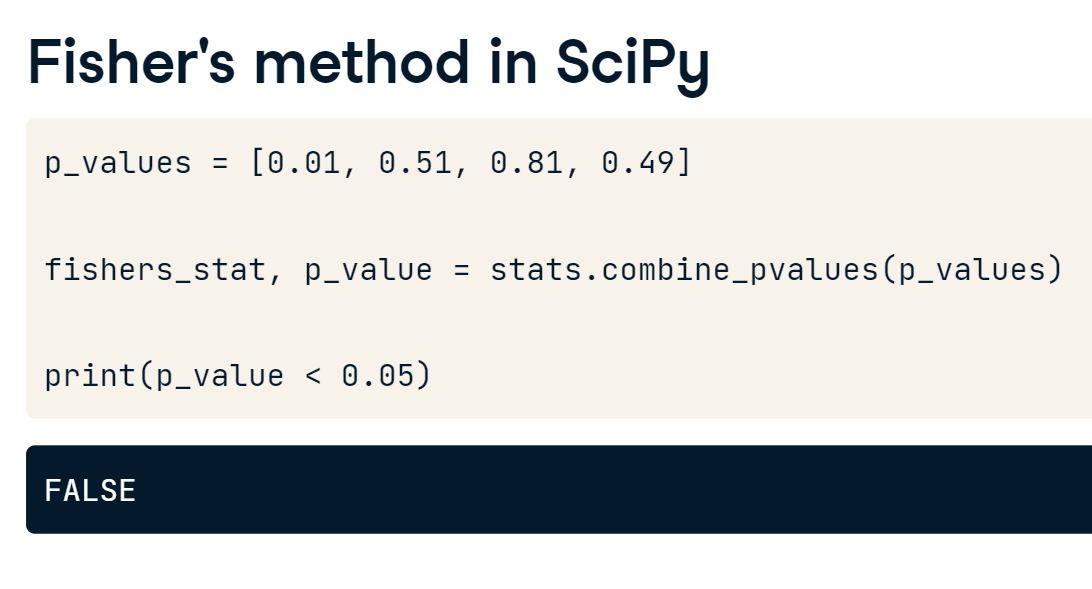

In this case, Fisher's method suggests that none of the studies should have rejected the null, and perhaps the one study which did is merely a fluke.

#### 4.2.1 Fisher's method in SciPy

In [138]:
p_values = [0.04, 0.13, 0.001, 0.09, 0.01]

In [139]:
# Compute the combined test-statistic and the p-value for this test
test_statistic, p_value = stats.combine_pvalues(p_values)

# Print out the p-value for the test
print('Test p-value = ', p_value)

# Print out if the p-value is signifcant at 5%
print(p_value<0.05)

Test p-value =  3.284794364823585e-05
True


> Based on the p-value of `3.284794364823585e-05`, out of all five studies **at least one** of them should have rejected the null hypothesis.

Fisher's method can be quite complex, since it's a hypothesis test (giving a p-value) about other hypothesis tests (also giving p-values)! Notice how Fisher's method doesn't tell you ***which*** of the tests should have been rejected, only that at least one is.

This may sound similar to ANOVA, where you often conclude that ***at least one*** mean is different from the others.

#### 4.2.2 Summarizing Fisher's method

- Assumes that all p-values are testing the same null hypothesis
- It's possible to conclude that some (but not all) null hypotheses should be rejected


### 4.3 Permutation tests

Permutation tests are a type of non-parametric test that allows us incredible flexibility. The ability to make inference in a broad range of situations makes permutation tests a great tool to have.

Suppose we are testing a change to our product and want to see if customer satisfaction goes up. We give one group of customers the new version and one the old version and measure the difference in satisfaction. We see a small difference, but want to know if this difference is significant.

A permutation test takes the customers, randomly shuffles them, and then computes the difference in the satisfaction ratings. Just due to random choice we'd expect to see some slight differences. By repeating this "shuffle and observe" process many times, we can understand what sorts of outcomes are expected just due to random chance alone. That allows us to take the situation we're interested in, namely the new versus old version, and see if the outcome we observed looks like those from random shuffling, or if it's a significantly larger difference.

We can perform permutation tests in SciPy using the `permutation_test()` function.

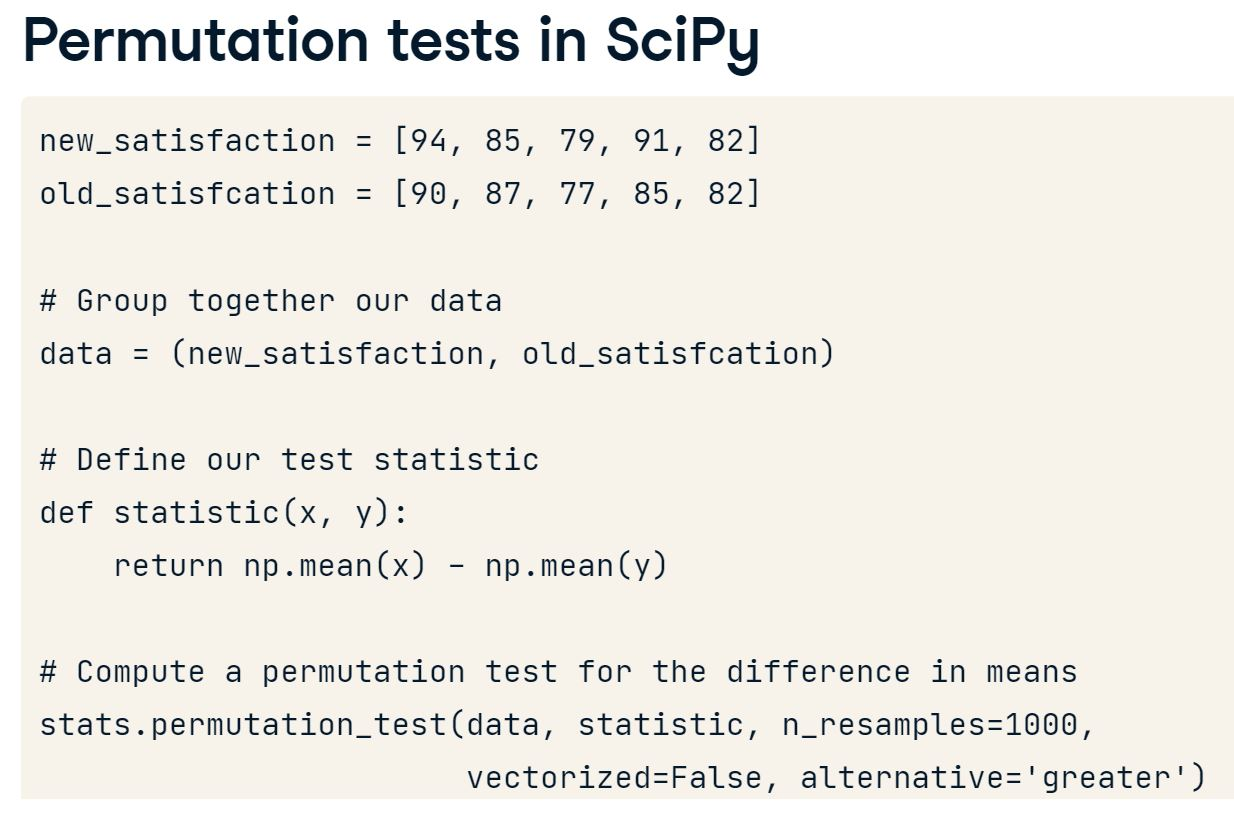

We choose whether our alternative hypothesis is that the observed value is greater than the null distribution, less than the null distribution, or a two-sided test, which looks for a difference.

The power of a permutation test is that, as long as we can write a function defining the statistic we're interested in, we can test it!

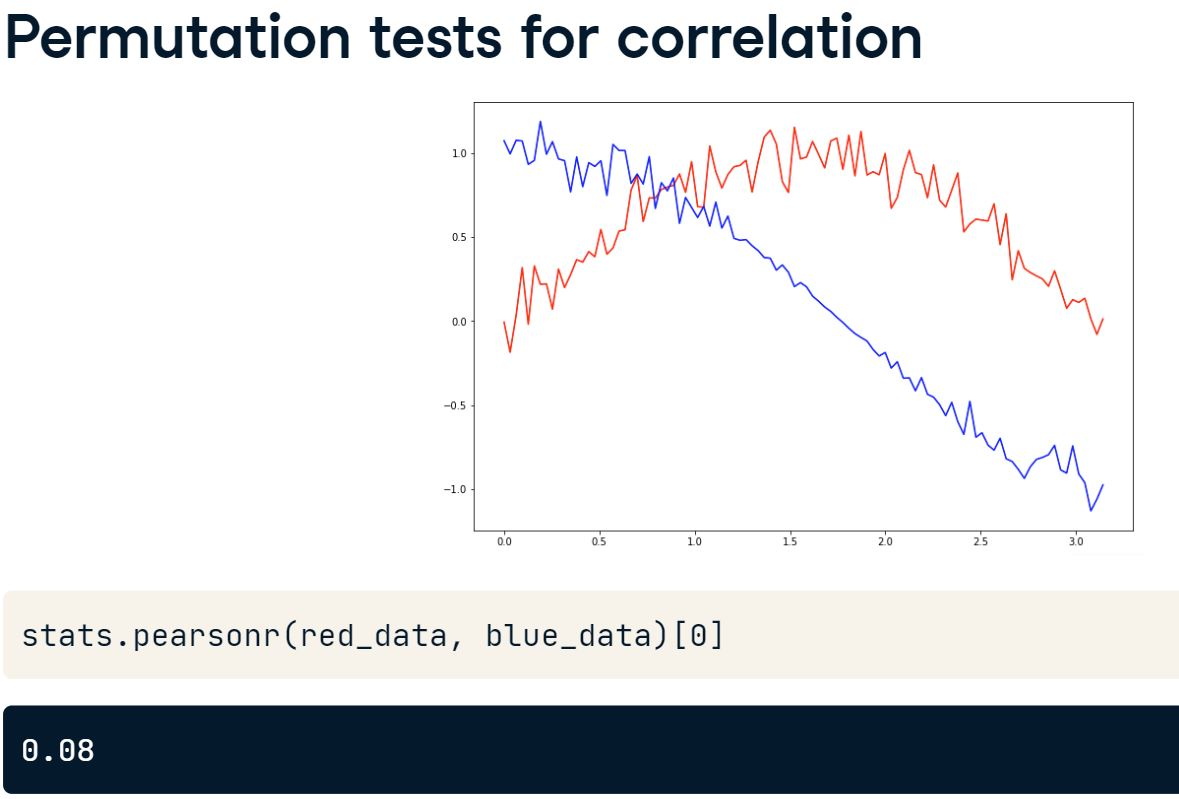

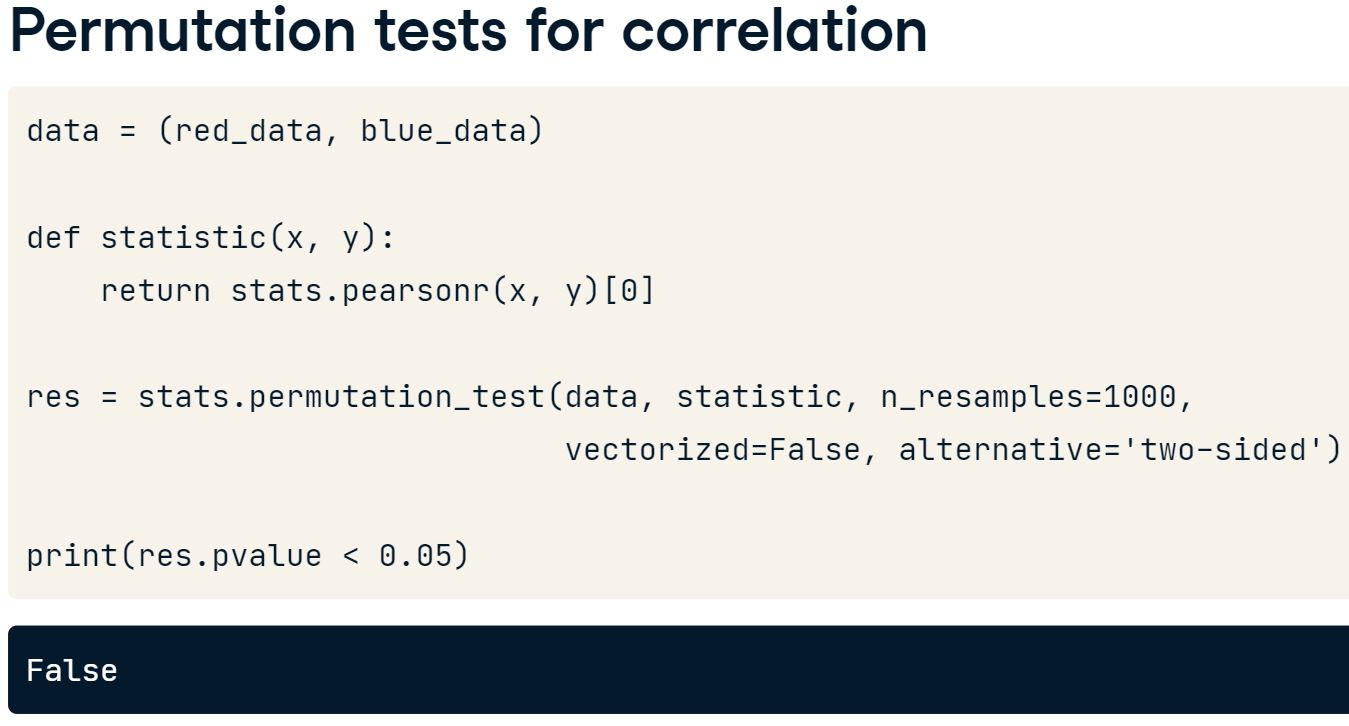

Note that the statistic function must return just the test statistic, and not other information like a p-value. That's why we access the zeroth entry of the return value. We then conduct a two-sided test using this data. The p-value returned from this test is not significant at the five percent level, meaning the correlation could just be due to random chance.

Permutation tests and the bootstrapping technique we saw earlier are similar, but slightly different. 

> **Bootstrapping builds a probability distribution by randomly sampling the data, and creates a confidence interval showing the most likely outcomes.**

> **Permutation tests build a null distribution by randomly shuffling the data, and tests for the significance of an outcome**

#### 4.3.1 Permutation tests for correlations

How does the volatility of Bitcoin compare to the volatility of the S&P 500?

One way to answer this is through a permutation test. By randomly shuffling values between the S&P 500 and BTC you are able to see what a random outcome would like like, and then compare this to the observed values.

In [143]:
btc_sp_df

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500,Volatility_BTC,Volatility_SP500,Pct_Daily_Change_BTC,Pct_Daily_Change_SP500
0,2017-08-07,3212.78,3397.68,3180.89,3378.94,2480.91,2477.14,2480.95,2475.88,0.06,0.00,-0.05,-0.00
1,2017-08-08,3370.22,3484.85,3345.83,3419.94,2474.92,2478.35,2490.87,2470.32,0.04,0.01,-0.01,0.00
2,2017-08-09,3420.40,3422.76,3247.67,3342.47,2474.02,2465.35,2474.41,2462.08,0.05,0.00,0.02,-0.00
3,2017-08-10,3341.84,3453.45,3319.47,3381.28,2438.21,2465.38,2465.38,2437.75,0.04,0.01,-0.01,0.01
4,2017-08-11,3373.82,3679.72,3372.12,3650.62,2441.32,2441.04,2448.09,2437.85,0.08,0.00,-0.08,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2022-07-29,23845.21,24294.79,23481.17,23804.63,4130.29,4087.33,4140.15,4079.22,0.03,0.01,0.00,-0.01
1254,2022-08-01,23336.72,23464.79,22890.80,23314.20,4118.63,4112.38,4144.95,4096.02,0.02,0.01,0.00,-0.00
1255,2022-08-02,23308.43,23415.04,22710.08,22978.12,4091.19,4104.21,4140.47,4079.81,0.03,0.01,0.01,0.00
1256,2022-08-03,22981.30,23578.65,22747.84,22846.51,4155.17,4107.96,4167.66,4107.96,0.04,0.01,0.01,-0.01


In [147]:
# Define a function which returns the Pearson R value
def statistic(x, y):
	return stats.pearsonr(x,y)[0] # we only want the r value

# Define the data as the percent daily change from each asset
data = (btc_sp_df['Pct_Daily_Change_BTC'], btc_sp_df['Pct_Daily_Change_SP500']) # must be a tuple

# Compute a permutation test for the percent daily change of each asset
res = stats.permutation_test(data, statistic, 
           n_resamples=1000,
           vectorized=False, 
           alternative='greater')

# Print if the p-value is significant at 5%
print(res.pvalue)
print(res.pvalue < 0.05)

0.000999000999000999
True


Hopefully this shows you the power of a permutation test, and how it can be used in a broad range of situations. We put absolutely no assumptions on our data, and yet were still able to conclude that the observed greater volatility in Bitcoin over SP500 is indeed statistically significant.

#### 4.3.2 Bootstrap confidence interval or Permutation Test ?

> You want to estimate a reasonable range of values for the mean difference between two variables: **Bootstrap CI**


> You want to understand if the mean difference between two values is likely to differ (be non-zero): **Permutation Test**

> You want to understand how much the mean difference between two variables can vary: **Bootstrap CI**

> You want to determine if an observed value of a mean difference between two variables is unusually large: **Permutation Test**

#### 4.3.3 Analyzing skewed data with a permutation test

Permutation tests can be useful for situations which don't satisfy the conditions of the hypothesis tests - i.e normally distributed data and equal variance.

We are interested in comparing the average number of funding rounds between between companies in the analytics space and all other venture-funded companies. While we may be tempted to use a *t-test*, we can be sure that the number of funding rounds is not normally distributed. 

Instead, the majority of companies have only one round, with the number of companies with two or more rounds quickly dropping off.

In [149]:
non_analytics_df = investments_df[investments_df['market'] != 'Analytics']
non_analytics_df

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity,log_funding
0,Games,4000000,operating,USA,2,0,4000000,0,0,15.20
1,Software,7000000,NaN,USA,1,0,7000000,0,0,15.76
2,Advertising,4912393,closed,ARG,1,0,0,0,0,15.41
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0,14.51
4,Games,41250,operating,HKG,1,41250,0,0,0,10.63
...,...,...,...,...,...,...,...,...,...,...
23675,Biotechnology,2686600,operating,AUT,1,0,2686600,0,0,14.80
23676,Education,320000,operating,GBR,1,320000,0,0,0,12.68
23677,Enterprise Software,1587301,operating,CHN,1,0,1587301,0,0,14.28
23678,Games,9300000,operating,NaN,1,9300000,0,0,0,16.05


In [159]:
# Write a "statistic" function which calculates the difference in means
def statistic(funding_group_1, funding_group_2):
  return np.mean(funding_group_1) - np.mean(funding_group_2)

# Conduct a permutation test using 100 resamples
perm_result = stats.permutation_test((analytics_df['funding_rounds'], non_analytics_df['funding_rounds']),
                                    statistic=statistic,
                                    n_resamples=100,
                                    vectorized=False)

# Print the p-value
print(perm_result.pvalue)

0.019801980198019802


As long as we can define a statistic, we can test pretty much anything, ***regardless of the underlying distribution!*** This allows lots of flexibility when we encounter situations that don't easily fit into the traditional hypothesis testing framework, which is based on the assumption of normality and equal variance.